In [566]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from numpy import mean, std
from math import sqrt
    

In [567]:
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv")
df.shape

(4543, 14)

In [568]:
df.head()
df['BATH'] = df['BATH'].astype(str).str.replace(',', '.')
df['BATH'] = df['BATH'].astype(float).astype(int)


In [569]:
df_luxury = df[df['LUXURY']]
df_normal = df[~df['LUXURY']]

# Exploratory Data Analysis (EDA)
## 1.1. Ph√¢n t√≠ch ƒê·ªãnh t√≠nh & ƒê·ªãnh l∆∞·ª£ng C∆° b·∫£n


In [570]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu:", df_normal.shape)
print("\nTh√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:")
print(df_normal.info())
print("\nTh·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë:")
display(df_normal.describe())

df_normal.sort_values(by='PRICE_PER_SQFT',ascending=True)

K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (3478, 14)

Th√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
Index: 3478 entries, 0 to 4528
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BROKERTITLE        3478 non-null   object 
 1   PRICE              3478 non-null   int64  
 2   BEDS               3478 non-null   int64  
 3   BATH               3478 non-null   int64  
 4   PROPERTYSQFT       3478 non-null   float64
 5   FORMATTED_ADDRESS  3478 non-null   object 
 6   LATITUDE           3478 non-null   float64
 7   LONGITUDE          3478 non-null   float64
 8   STATUS             3478 non-null   object 
 9   PROPERTY_TYPE      3478 non-null   object 
 10  ZIP                3478 non-null   int64  
 11  BOROUGH            3478 non-null   object 
 12  PRICE_PER_SQFT     3478 non-null   float64
 13  LUXURY             3478 non-null   bool   
dtypes: bool(1), float64(4), int64(4), objec

PRICE     BEDS     BATH  PROPERTYSQFT  LATITUDE  LONGITUDE  \
count     3,478.00 3,478.00 3,478.00      3,478.00  3,478.00   3,478.00   
mean    749,620.46     3.09     2.00      1,818.69     40.71     -73.93   
std     430,511.22     1.98     1.17        804.34      0.09       0.11   
min      49,500.00     1.00     1.00        230.00     40.50     -74.25   
25%     399,000.00     2.00     1.00      1,150.00     40.63     -73.98   
50%     680,000.00     3.00     2.00      2,184.21     40.72     -73.92   
75%     989,000.00     4.00     2.00      2,184.21     40.77     -73.85   
max   1,999,999.00    19.00    10.00      7,854.00     40.91     -73.70   

            ZIP  PRICE_PER_SQFT  
count  3,478.00        3,478.00  
mean  10,852.93          439.83  
std      541.68          212.61  
min   10,001.00           45.33  
25%   10,309.00          287.55  
50%   11,208.00          411.79  
75%   11,360.00          571.80  
max   11,697.00        1,000.00

BROKERTITLE    PRICE  BEDS  BATH  PROPERTYSQFT  \
42             5 boro corp    99000     1     1      2,184.21   
65         keller williams   109000     1     1      2,184.21   
1764              nobroker   115000     3     1      2,184.21   
1939      la rosa new york   119000     3     1      2,184.21   
1957  century 21 milestone   119000     3     1      2,184.21   
...                    ...      ...   ...   ...           ...   
1451              kms  inc   948888     2     2        950.00   
4109                re/max  1439000     6     4      1,440.00   
2483        citywide deals  1899000     3     2      1,900.00   
3851               compass  1999000     5     4      2,000.00   
1907               serhant  1099999     3     1      1,100.00   

                                      FORMATTED_ADDRESS  LATITUDE  LONGITUDE  \
42         1368 E 92nd St #300, Brooklyn, NY 11236, USA     40.64     -73.90   
65           335 E 209th St Apt 4, Bronx, NY 10467, USA     40.88     -73.87   
1764         87-15 165th St #6c, Jamaica, NY 11432, USA     40.71     -73.80   
1939        86-16 60th Ave #1c, Elmhurst, NY 11373, USA     40.73     -73.87   
1957      8900 170th St Apt 11l, Jamaica, NY 11432, USA     40.71     -73.79   
...                                                 ...       ...        ...   
1451           115 96th St #6a, Brooklyn, NY 11209, USA     40.62     -74.04   
4109              1019 58th St, Brooklyn, NY 11219, USA     40.63     -74.00   
2483     105 Oceana Dr E Ph 1D, Brooklyn, NY 11235, USA     40.58     -73.96   
3851  34-51 74th Street, Jackson Heights, NY 11372, USA     40.75     -73.89   
1907             19-36 75th St, Flushing, NY 11370, USA     40.77     -73.90   

       STATUS PROPERTY_TYPE    ZIP    BOROUGH  PRICE_PER_SQFT  LUXURY  
42    unknown         condo  11236   Brooklyn           45.33   False  
65    unknown         co op  10467      Bronx           49.90   False  
1764  unknown         co op  11432     Queens           52.65   False  
1939  pending         other  11373     Queens           54.48   False  
1957  unknown         co op  11432     Queens           54.48   False  
...       ...           ...    ...        ...             ...     ...  
1451  unknown         condo  11209   Brooklyn          998.83   False  
4109  unknown         house  11219  Manhattan          999.31   False  
2483  unknown         condo  11235   Brooklyn          999.47   False  
3851  unknown         house  11372  Manhattan          999.50   False  
1907  unknown         house  11370  Manhattan        1,000.00   False  

[3478 rows x 14 columns]

Ph√¢n b·ªï gi√° l·ªách ph·∫£i m·∫°nh, ch·ªß y·∫øu t·∫≠p trung ·ªü ph√¢n kh√∫c 400k‚Äì1M USD.

Manhattan n·ªïi b·∫≠t v·ªõi gi√°/sqft cao nh·∫•t (~1.000 USD/sqft), trong khi Bronx/Queens c√≥ nhi·ªÅu cƒÉn h·ªô gi√° r·∫ª.

Outlier t·ªìn t·∫°i ·ªü s·ªë ph√≤ng ng·ªß (19), di·ªán t√≠ch (2.184 sqft l·∫∑p l·∫°i nhi·ªÅu l·∫ßn, nghi ng·ªù d·ªØ li·ªáu nh·∫≠p).

Th·ªã tr∆∞·ªùng ƒëa d·∫°ng: t·ª´ cƒÉn h·ªô nh·ªè v√†i ch·ª•c ngh√¨n ƒë√¥ ƒë·∫øn b·∫•t ƒë·ªông s·∫£n g·∫ßn 2 tri·ªáu ƒë√¥, ph√π h·ª£p nhi·ªÅu ƒë·ªëi t∆∞·ª£ng ng∆∞·ªùi mua.

In [571]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu:", df_luxury.shape)

print("\nTh√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:")
print(df_luxury.info())
print("\nTh·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë:")
display(df_luxury.describe())


df_luxury.sort_values(by='PRICE_PER_SQFT',ascending=True)

K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (1065, 14)

Th√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
Index: 1065 entries, 8 to 4542
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BROKERTITLE        1065 non-null   object 
 1   PRICE              1065 non-null   int64  
 2   BEDS               1065 non-null   int64  
 3   BATH               1065 non-null   int64  
 4   PROPERTYSQFT       1065 non-null   float64
 5   FORMATTED_ADDRESS  1065 non-null   object 
 6   LATITUDE           1065 non-null   float64
 7   LONGITUDE          1065 non-null   float64
 8   STATUS             1065 non-null   object 
 9   PROPERTY_TYPE      1065 non-null   object 
 10  ZIP                1065 non-null   int64  
 11  BOROUGH            1065 non-null   object 
 12  PRICE_PER_SQFT     1065 non-null   float64
 13  LUXURY             1065 non-null   bool   
dtypes: bool(1), float64(4), int64(4), objec

PRICE     BEDS     BATH  PROPERTYSQFT  LATITUDE  LONGITUDE  \
count       1,065.00 1,065.00 1,065.00      1,065.00  1,065.00   1,065.00   
mean    5,729,867.61     4.26     3.52      3,346.51     40.73     -73.97   
std     9,325,390.18     3.96     3.22      4,297.36      0.06       0.05   
min       250,000.00     1.00     1.00        246.00     40.52     -74.22   
25%     2,088,000.00     2.00     2.00      1,472.00     40.70     -73.99   
50%     2,995,000.00     3.00     2.00      2,184.21     40.74     -73.97   
75%     5,925,000.00     5.00     4.00      3,900.00     40.77     -73.96   
max   195,000,000.00    50.00    50.00     65,535.00     40.90     -73.74   

            ZIP  PRICE_PER_SQFT  
count  1,065.00        1,065.00  
mean  10,451.87        1,888.91  
std      568.97        2,047.33  
min   10,001.00          105.37  
25%   10,019.00        1,060.61  
50%   10,031.00        1,387.93  
75%   11,209.00        2,003.00  
max   11,694.00       27,469.91

BROKERTITLE     PRICE  BEDS  BATH  PROPERTYSQFT  \
2766                 myc  inc   5827000     3     2     55,300.00   
2763                  link ny   2300000     3     2     21,000.00   
4534          coldwell banker   2700000    24    24     18,936.00   
2732  andrew lichtenstein inc   7200000     3     2     48,000.00   
2824    american dream kalaba   3200000     3     2     17,000.00   
...                       ...       ...   ...   ...           ...   
3092                 corcoran  34000000     3     8      2,184.21   
3958                sotheby's  44500000     5     6      2,184.21   
3748                sotheby's  45000000     5     2      2,184.21   
3734                 corcoran  48000000     5     2      2,184.21   
4397                  compass  60000000     8     8      2,184.21   

                                      FORMATTED_ADDRESS  LATITUDE  LONGITUDE  \
2766            99-44 62nd Ave, Flushing, NY 11374, USA     40.74     -73.86   
2763                96 E 208th St, Bronx, NY 10467, USA     40.88     -73.88   
4534      3520 Newkirk Ave #24, Brooklyn, NY 11203, USA     40.64     -73.94   
2732              3650 Bronx Blvd, Bronx, NY 10467, USA     40.88     -73.87   
2824  151 Daniel Low Terrace, Staten Island, NY 1030...     40.64     -74.08   
...                                                 ...       ...        ...   
3092             217 W 21st St, New York, NY 10011, USA     40.74     -74.00   
3958          2 E 67th St Fl 9, New York, NY 10065, USA     40.77     -73.97   
3748          4 E 66th St Fl 7, New York, NY 10065, USA     40.77     -73.97   
3734           740 Park Ave #5, New York, NY 10021, USA     40.77     -73.96   
4397           960 5th Ave #12, New York, NY 10075, USA     40.78     -73.96   

       STATUS      PROPERTY_TYPE    ZIP    BOROUGH  PRICE_PER_SQFT  LUXURY  
2766  unknown  multi family home  11374  Manhattan          105.37    True  
2763  unknown  multi family home  10467  Manhattan          109.52    True  
4534  unknown  multi family home  11203   Brooklyn          142.59    True  
2732  unknown  multi family home  10467  Manhattan          150.00    True  
2824  unknown  multi family home  10301  Manhattan          188.24    True  
...       ...                ...    ...        ...             ...     ...  
3092  unknown  multi family home  10011  Manhattan       15,566.28    True  
3958  unknown              co op  10065  Manhattan       20,373.52    True  
3748  unknown              co op  10065  Manhattan       20,602.43    True  
3734  unknown              co op  10021  Manhattan       21,975.93    True  
4397  unknown              co op  10075  Manhattan       27,469.91    True  

[1065 rows x 14 columns]

In [572]:

print("=== K·∫æT QU·∫¢ PH√ÇN T√çCH NHANH ===")
print(f"T·ªïng s·ªë nh√†: {len(df)}")
print(f"S·ªë nh√† luxury: {len(df_luxury)}")
print(f"S·ªë nh√† th∆∞·ªùng: {len(df_normal)}")
print(f"\n Gi√° trung v·ªã ph√¢n kh√∫c:")
print(f"- Luxury: {df_luxury['PRICE_PER_SQFT'].median():.1f}")
print(f"- Th∆∞·ªùng: {df_normal['PRICE_PER_SQFT'].median():.1f}")
print(f"\nS·ªë ph√≤ng ng·ªß trung b√¨nh:")
print(f"- Luxury: {df_luxury['BEDS'].mean():.1f}")
print(f"- Th∆∞·ªùng: {df_normal['BEDS'].mean():.1f}")
print(f"\nPh√¢n b·ªï ·ªü Manhattan:")
print(f"- Luxury: {(df_luxury['BOROUGH'].str.contains('Manhattan').sum() / len(df_luxury) * 100):.1f}%")
print(f"- Th∆∞·ªùng: {(df_normal['BOROUGH'].str.contains('Manhattan').sum() / len(df_normal) * 100):.1f}%")

=== K·∫æT QU·∫¢ PH√ÇN T√çCH NHANH ===
T·ªïng s·ªë nh√†: 4543
S·ªë nh√† luxury: 1065
S·ªë nh√† th∆∞·ªùng: 3478

 Gi√° trung v·ªã ph√¢n kh√∫c:
- Luxury: 1387.9
- Th∆∞·ªùng: 411.8

S·ªë ph√≤ng ng·ªß trung b√¨nh:
- Luxury: 4.3
- Th∆∞·ªùng: 3.1

Ph√¢n b·ªï ·ªü Manhattan:
- Luxury: 90.6%
- Th∆∞·ªùng: 67.7%


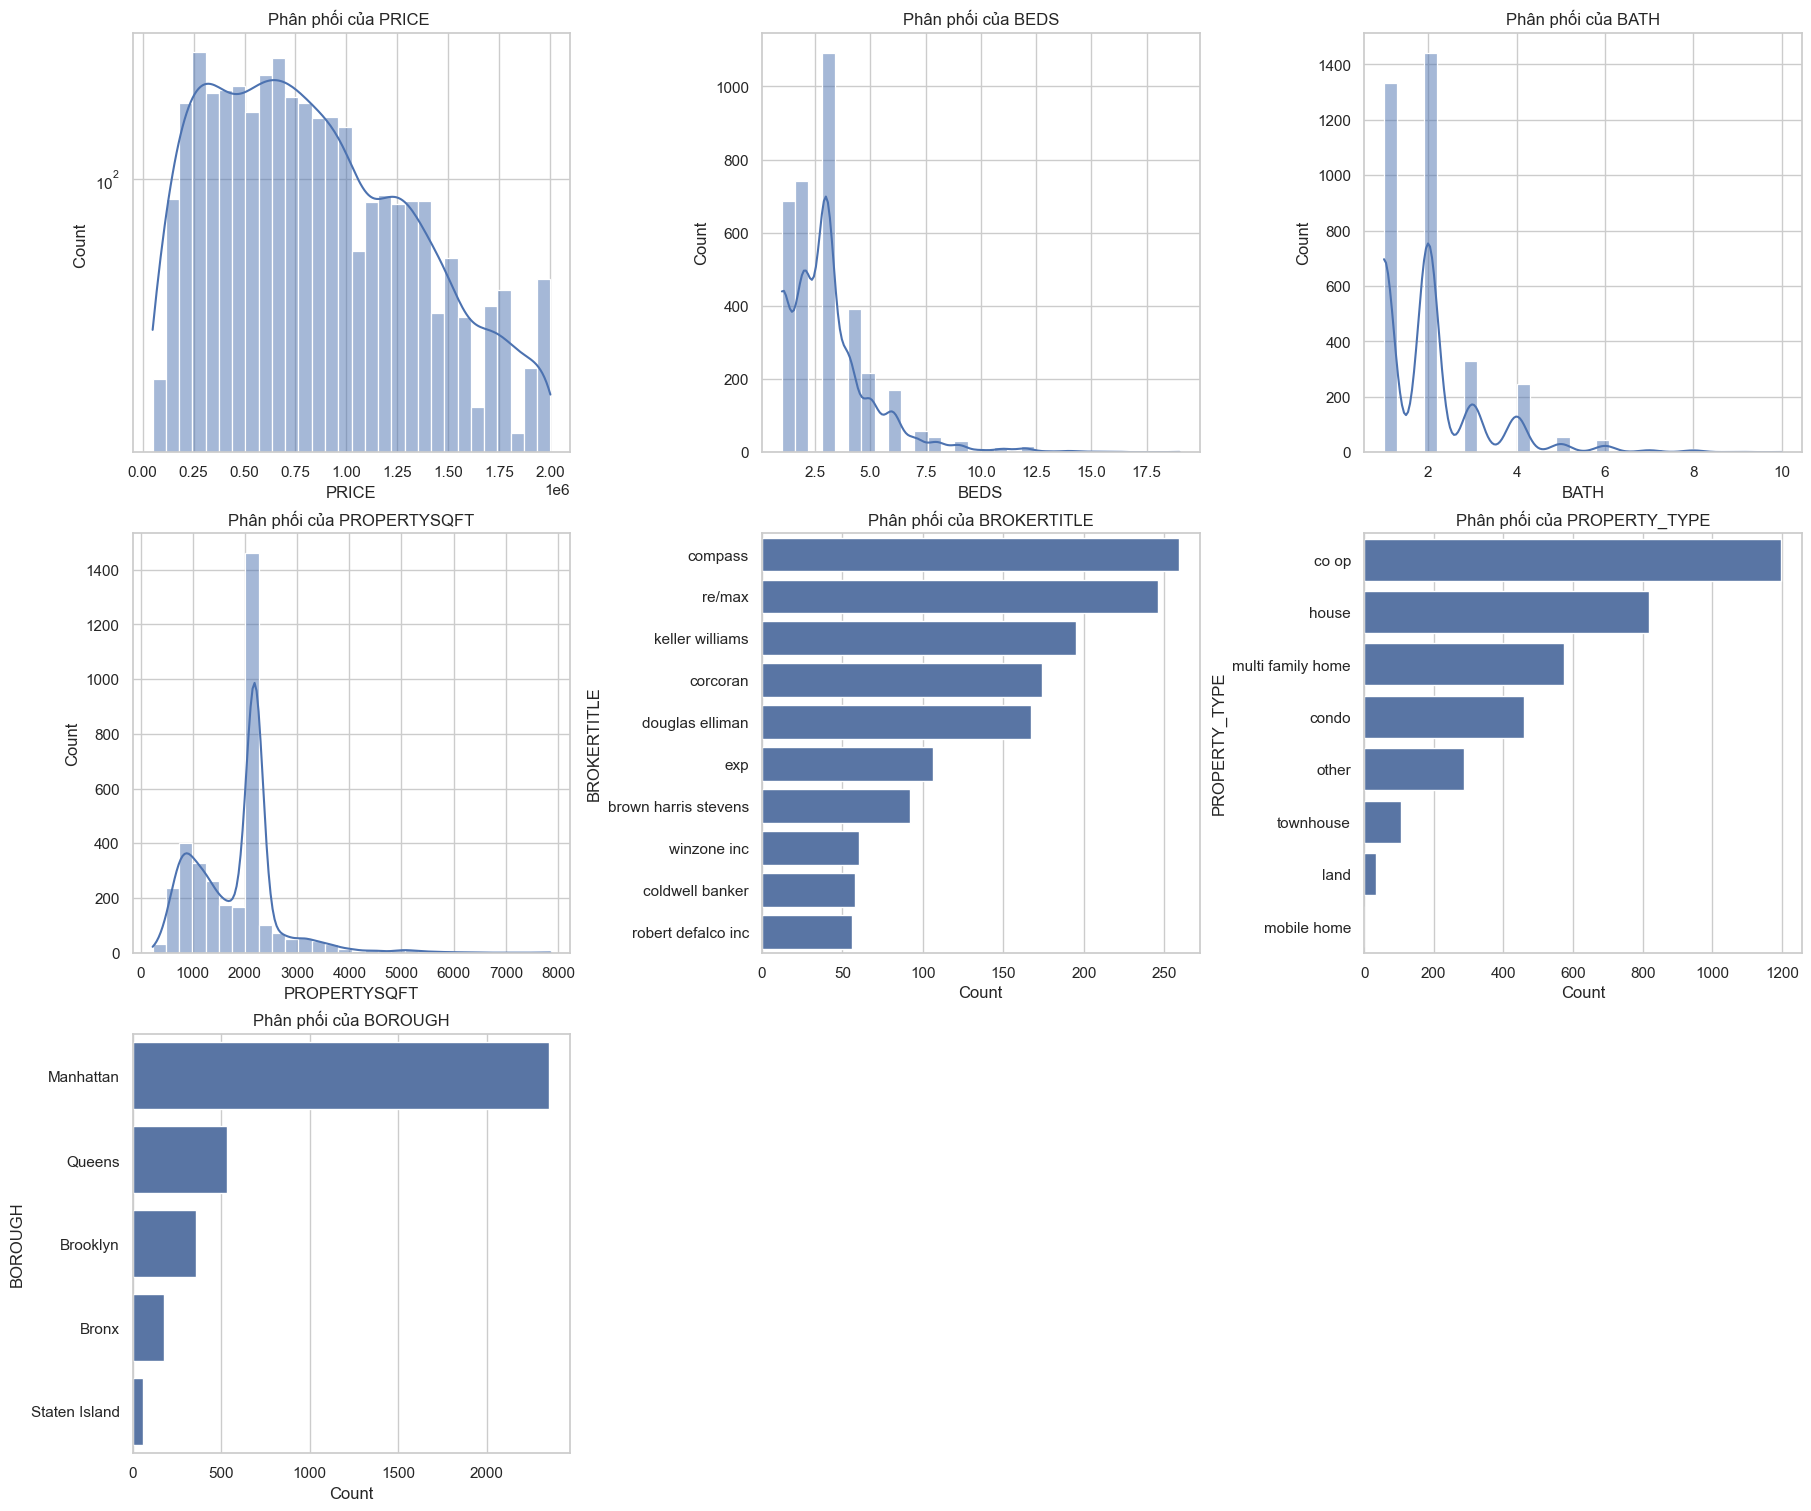

In [573]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} ')
            ax.set_ylabel('Count ')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

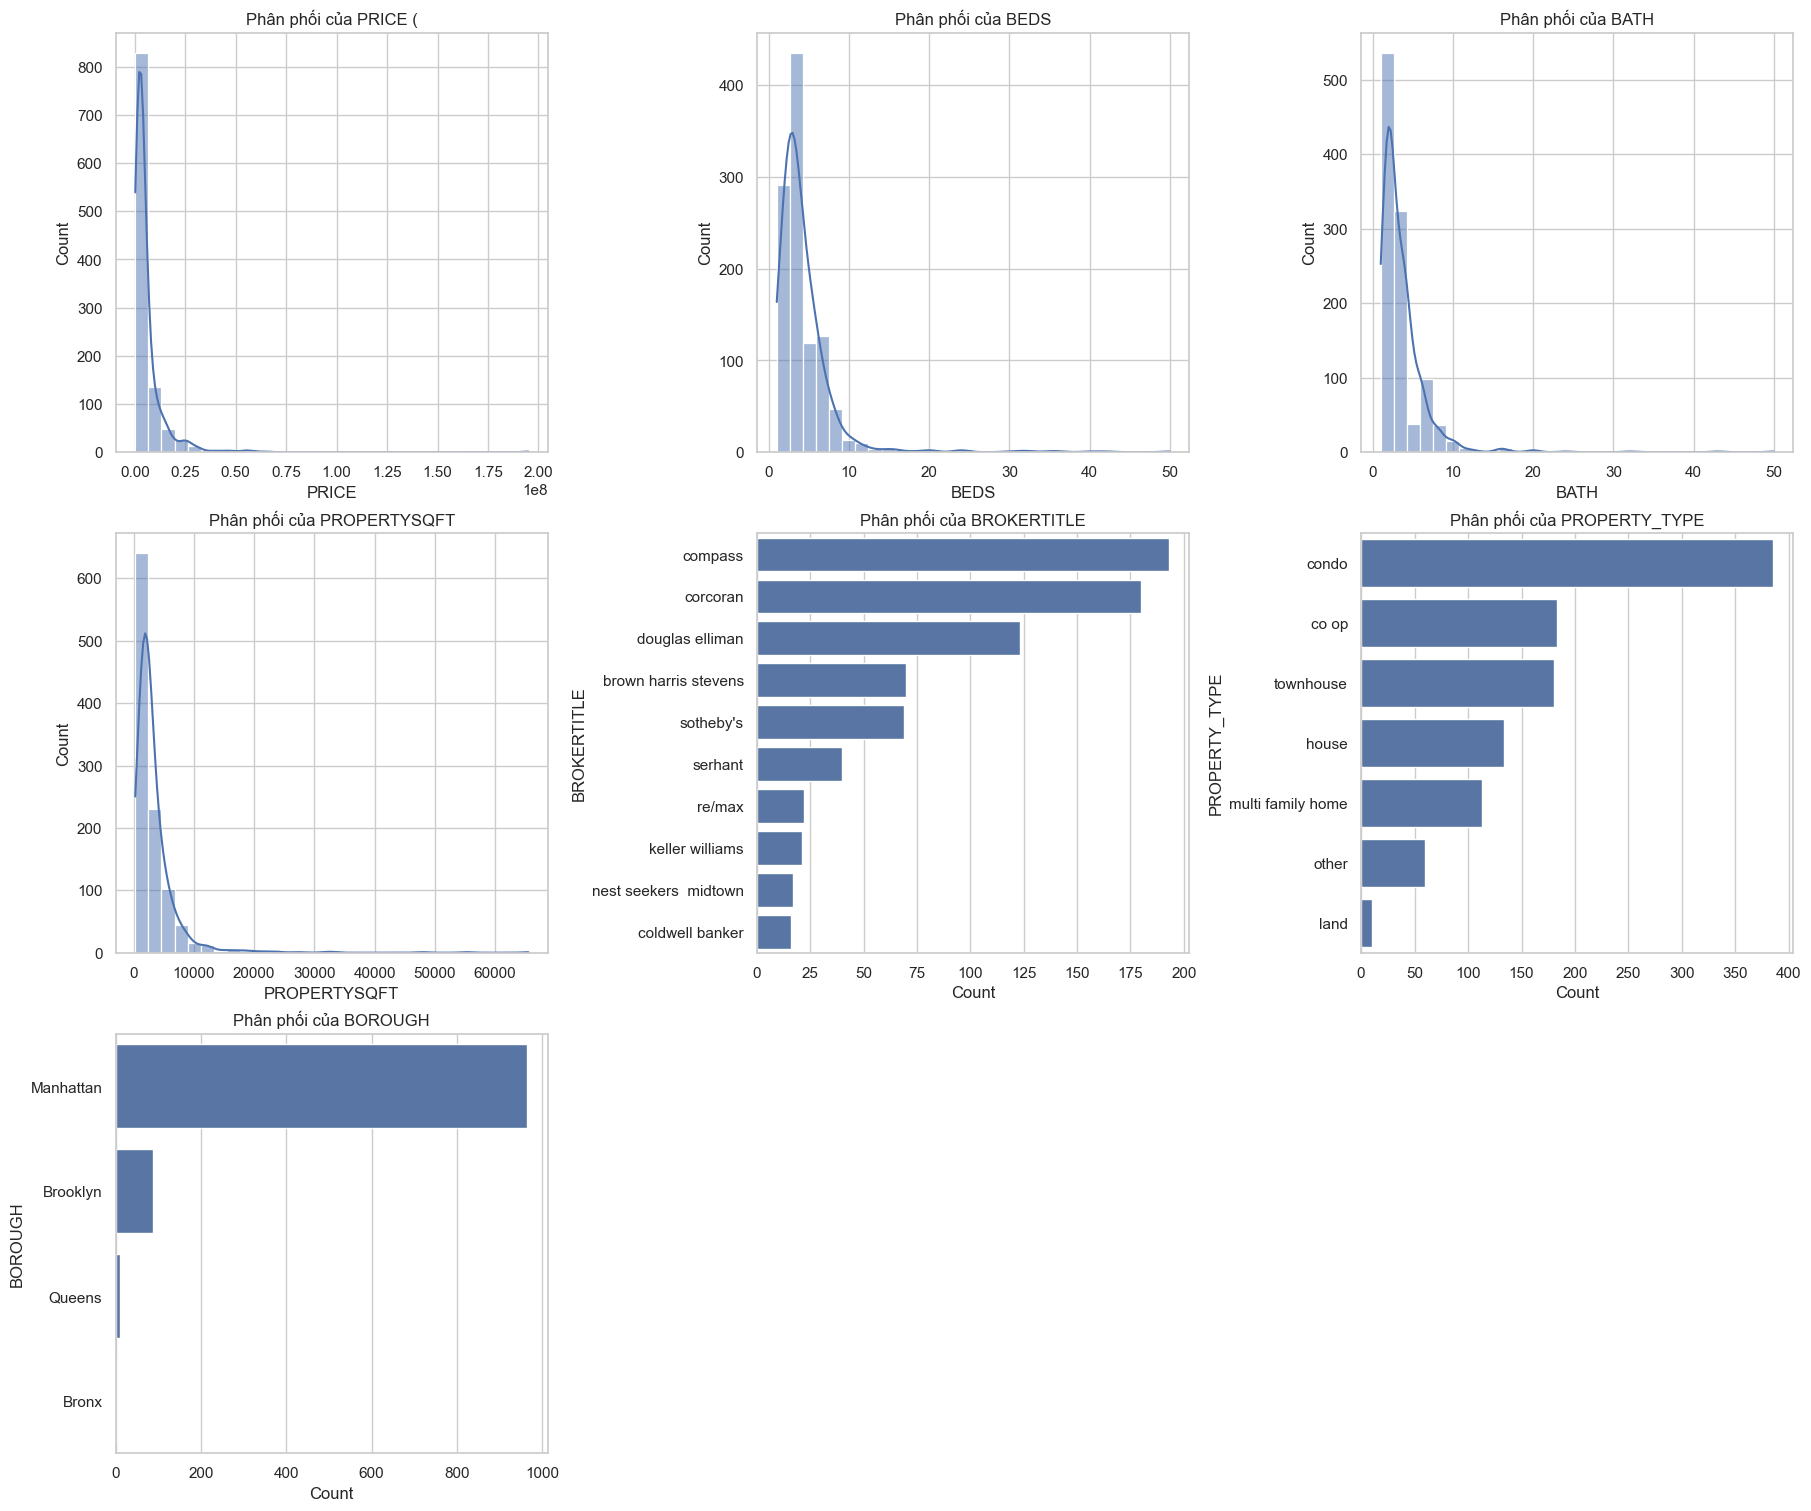

In [574]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (')
            ax.set_ylabel('Count')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Luxury c√≥ gi√° trung b√¨nh 5.7M c√≤n th∆∞·ªùng ch·∫Øc th·∫•p h∆°n nhi·ªÅu.

N·∫øu ch·ªâ nh√¨n b·∫£ng th√¨ ta th·∫•y ‚Äúluxury ƒë·∫Øt h∆°n‚Äù.

Nh∆∞ng ƒë·ªÉ ch·∫Øc ch·∫Øn, ta l√†m t-test so s√°nh gi√° gi·ªØa 2 ph√¢n kh√∫c.


In [575]:
t_stat, p_value = stats.ttest_ind(
    df_luxury['PRICE'], 
    df_normal['PRICE'], 
    equal_var=False  # Welch's t-test, an to√†n khi ph∆∞∆°ng sai 2 nh√≥m kh√°c nhau
)

print("So s√°nh gi√° trung b√¨nh gi·ªØa Luxury v√† Th∆∞·ªùng")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Luxury th·∫≠t s·ª± ƒë·∫Øt h∆°n th∆∞·ªùng v·ªõi √Ω nghƒ©a th·ªëng k√™ (p < 0.05).")
else:
    print("Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Luxury ƒë·∫Øt h∆°n th∆∞·ªùng.")

# B·∫°n c√≥ th·ªÉ ki·ªÉm ƒë·ªãnh t∆∞∆°ng t·ª± cho gi√°/m¬≤
t_stat_psqft, p_value_psqft = stats.ttest_ind(
    df_luxury['PRICE_PER_SQFT'], 
    df_normal['PRICE_PER_SQFT'], 
    equal_var=False
)

print("\nSo s√°nh gi√°/m¬≤ gi·ªØa Luxury v√† Th∆∞·ªùng")
print(f"T-statistic: {t_stat_psqft:.2f}")
print(f"P-value: {p_value_psqft:.5f}")

if p_value_psqft < 0.05:
    print("Luxury th·∫≠t s·ª± c√≥ gi√°/m¬≤ cao h∆°n v·ªõi √Ω nghƒ©a th·ªëng k√™.")
else:
    print(" Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Luxury c√≥ gi√°/m¬≤ cao h∆°n.")

So s√°nh gi√° trung b√¨nh gi·ªØa Luxury v√† Th∆∞·ªùng
T-statistic: 17.42
P-value: 0.00000
Luxury th·∫≠t s·ª± ƒë·∫Øt h∆°n th∆∞·ªùng v·ªõi √Ω nghƒ©a th·ªëng k√™ (p < 0.05).

So s√°nh gi√°/m¬≤ gi·ªØa Luxury v√† Th∆∞·ªùng
T-statistic: 23.06
P-value: 0.00000
Luxury th·∫≠t s·ª± c√≥ gi√°/m¬≤ cao h∆°n v·ªõi √Ω nghƒ©a th·ªëng k√™.


In [576]:
import pandas as pd

# T√≠nh c√°c ch·ªâ s·ªë cho m·ªói ph√¢n kh√∫c
summary = {
    "Ch·ªâ s·ªë": [
        "Gi√° trung b√¨nh (Avg Price)",
        "Gi√° trung v·ªã (Median Price)",
        "Gi√°/m¬≤ trung b√¨nh (Avg PPSQFT)",
        "S·ªë ph√≤ng t·∫Øm trung b√¨nh (Avg Bath)",
        "S·ªë ph√≤ng ng·ªß trung b√¨nh (Avg Beds)",
        "Di·ªán t√≠ch trung b√¨nh (Avg SqFt)"
    ],
    "Ph√¢n kh√∫c Th∆∞·ªùng": [
        df_normal['PRICE'].mean(),
        df_normal['PRICE'].median(),
        df_normal['PRICE_PER_SQFT'].mean(),
        df_normal['BATH'].mean(),
        df_normal['BEDS'].mean(),
        df_normal['PROPERTYSQFT'].mean()
    ],
    "Ph√¢n kh√∫c Luxury": [
        df_luxury['PRICE'].mean(),
        df_luxury['PRICE'].median(),
        df_luxury['PRICE_PER_SQFT'].mean(),
        df_luxury['BATH'].mean(),
        df_luxury['BEDS'].mean(),
        df_luxury['PROPERTYSQFT'].mean()
    ]
}

# T·∫°o DataFrame
comparison_df = pd.DataFrame(summary)

# Th√™m c·ªôt T·ª∑ l·ªá Luxury / Th∆∞·ªùng
comparison_df["T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)"] = (
    comparison_df["Ph√¢n kh√∫c Luxury"] / comparison_df["Ph√¢n kh√∫c Th∆∞·ªùng"]
)

# Format ƒë·∫πp h∆°n
def format_value(val, is_price=False):
    if is_price:
        return f"${val:,.0f}"
    else:
        return f"{val:.1f}"

comparison_df["Ph√¢n kh√∫c Th∆∞·ªùng"] = [
    format_value(v, i < 2) for i, v in enumerate(summary["Ph√¢n kh√∫c Th∆∞·ªùng"])
]
comparison_df["Ph√¢n kh√∫c Luxury"] = [
    format_value(v, i < 2) for i, v in enumerate(summary["Ph√¢n kh√∫c Luxury"])
]
comparison_df["T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)"] = [
    f"{v:.1f}x" for v in comparison_df["T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)"]
]

print(comparison_df.to_string(index=False))


                            Ch·ªâ s·ªë Ph√¢n kh√∫c Th∆∞·ªùng Ph√¢n kh√∫c Luxury T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)
        Gi√° trung b√¨nh (Avg Price)         $749,620       $5,729,868                             7.6x
       Gi√° trung v·ªã (Median Price)         $680,000       $2,995,000                             4.4x
    Gi√°/m¬≤ trung b√¨nh (Avg PPSQFT)            439.8           1888.9                             4.3x
S·ªë ph√≤ng t·∫Øm trung b√¨nh (Avg Bath)              2.0              3.5                             1.8x
S·ªë ph√≤ng ng·ªß trung b√¨nh (Avg Beds)              3.1              4.3                             1.4x
   Di·ªán t√≠ch trung b√¨nh (Avg SqFt)           1818.7           3346.5                             1.8x


##  Gi√° b√°n  
- Luxury ƒë·∫Øt **7.6x** th∆∞·ªùng, di·ªán t√≠ch ch·ªâ **1.8x** ‚Üí kh√°ch h√†ng tr·∫£ ti·ªÅn cho **gi√° tr·ªã v√¥ h√¨nh** (v·ªã tr√≠, ti·ªán √≠ch, th∆∞∆°ng hi·ªáu, sang tr·ªçng).  

##  Gi√°/m¬≤ (PPSQFT)  
- Luxury cao h∆°n **4.3x** th∆∞·ªùng ‚Üí gi√° tr·ªã m·ªói m¬≤ ph·∫£n √°nh **ƒë·∫≥ng c·∫•p tr√™n m·ªói m√©t vu√¥ng**, kh√¥ng t·ª∑ l·ªá thu·∫≠n di·ªán t√≠ch.  

##  Ph√≤ng t·∫Øm &  Ph√≤ng ng·ªß  
- Ph√≤ng t·∫Øm **1.8x**, ph√≤ng ng·ªß **1.4x** ‚Üí ∆Øu ti√™n **ti·ªán nghi c√° nh√¢n (bathroom)** quan tr·ªçng h∆°n kh·∫£ nƒÉng ch·ª©a ng∆∞·ªùi (bedroom) trong ph√¢n kh√∫c sang tr·ªçng.

##  Di·ªán t√≠ch  
- Luxury l·ªõn h∆°n **1.8x**, nh∆∞ng gi√° **7.6x** ‚Üí di·ªán t√≠ch ch·ªâ l√† **m·ªôt ph·∫ßn nh·ªè**, y·∫øu t·ªë v√¥ h√¨nh m·ªõi ƒë·∫©y gi√°.  

##  T√≥m l·∫°i  
Luxury = **di·ªán t√≠ch + v·ªã tr√≠ + ti·ªán nghi + tr·∫£i nghi·ªám s·ªëng ƒë·∫≥ng c·∫•p**, khi·∫øn kh√°ch h√†ng **s·∫µn s√†ng tr·∫£ g·∫•p nhi·ªÅu l·∫ßn**.  


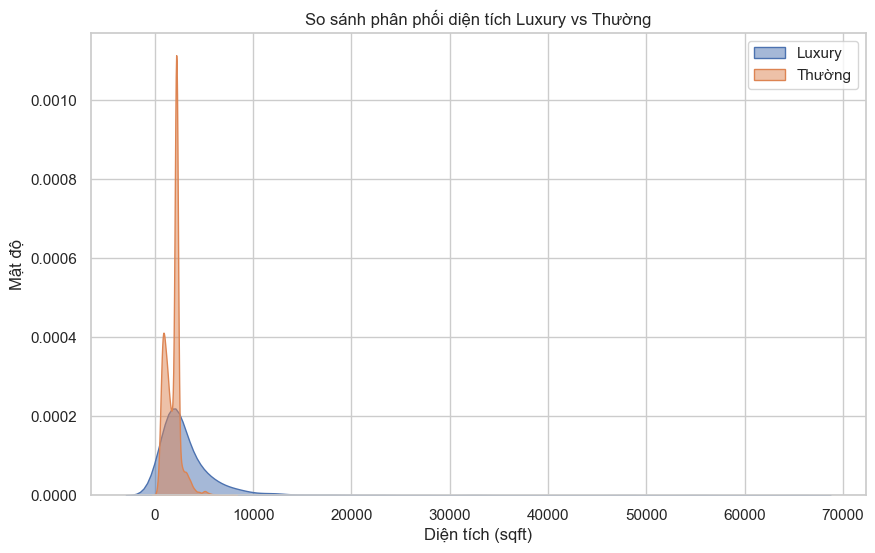

So s√°nh di·ªán t√≠ch trung b√¨nh (PROPERTYSQFT) gi·ªØa Luxury v√† Th∆∞·ªùng
T-statistic: 11.54
P-value: 0.00000
‚úÖ Luxury c√≥ di·ªán t√≠ch trung b√¨nh kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi Th∆∞·ªùng (p < 0.05).


In [577]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_luxury['PROPERTYSQFT'], label='Luxury', fill=True, alpha=0.5)
sns.kdeplot(df_normal['PROPERTYSQFT'], label='Th∆∞·ªùng', fill=True, alpha=0.5)
plt.xlabel('Di·ªán t√≠ch (sqft)')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.title('So s√°nh ph√¢n ph·ªëi di·ªán t√≠ch Luxury vs Th∆∞·ªùng')
plt.legend()
plt.show()

# --- Th·ª±c hi·ªán t-test ---
t_stat, p_value = stats.ttest_ind(df_luxury['PROPERTYSQFT'], df_normal['PROPERTYSQFT'], equal_var=False)

print("So s√°nh di·ªán t√≠ch trung b√¨nh (PROPERTYSQFT) gi·ªØa Luxury v√† Th∆∞·ªùng")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("‚úÖ Luxury c√≥ di·ªán t√≠ch trung b√¨nh kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi Th∆∞·ªùng (p < 0.05).")
else:
    print("‚ùå Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Luxury kh√°c bi·ªát di·ªán t√≠ch so v·ªõi Th∆∞·ªùng.")

In [578]:
def property_type_stats(df, name):
    counts = df['PROPERTY_TYPE'].value_counts(normalize=True) * 100
    return pd.DataFrame({
        f'{name}_count': df['PROPERTY_TYPE'].value_counts(),
        f'{name}_percent': counts.round(2)
    })

std_property = property_type_stats(df_normal, 'Standard')
lux_property = property_type_stats(df_luxury, 'Luxury')

property_compare = pd.concat([std_property, lux_property], axis=1).fillna(0)

print("üìä So s√°nh lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n (PROPERTY_TYPE):")
display(property_compare)


# 2Ô∏è‚É£ Ph√¢n b·ªë ƒë·ªãa l√Ω theo BOROUGH
def borough_stats(df, name):
    counts = df['BOROUGH'].value_counts(normalize=True) * 100
    return pd.DataFrame({
        f'{name}_count': df['BOROUGH'].value_counts(),
        f'{name}_percent': counts.round(2)
    })

std_borough = borough_stats(df_normal, 'Standard')
lux_borough = borough_stats(df_luxury, 'Luxury')

borough_compare = pd.concat([std_borough, lux_borough], axis=1).fillna(0)

print("\nüìç So s√°nh theo BOROUGH:")
display(borough_compare)




üìä So s√°nh lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n (PROPERTY_TYPE):


Standard_count  Standard_percent  Luxury_count  \
PROPERTY_TYPE                                                       
co op                        1197             34.42        183.00   
house                         819             23.55        134.00   
multi family home             575             16.53        113.00   
condo                         458             13.17        385.00   
other                         287              8.25         60.00   
townhouse                     107              3.08        180.00   
land                           34              0.98         10.00   
mobile home                     1              0.03          0.00   

                   Luxury_percent  
PROPERTY_TYPE                      
co op                       17.18  
house                       12.58  
multi family home           10.61  
condo                       36.15  
other                        5.63  
townhouse                   16.90  
land                         0.94  
mobile home                  0.00


üìç So s√°nh theo BOROUGH:


Standard_count  Standard_percent  Luxury_count  Luxury_percent
BOROUGH                                                                      
Manhattan                2355             67.71        965.00           90.61
Queens                    531             15.27         11.00            1.03
Brooklyn                  359             10.32         88.00            8.26
Bronx                     175              5.03          1.00            0.09
Staten Island              58              1.67          0.00            0.00

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\3510488990.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\3510488990.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



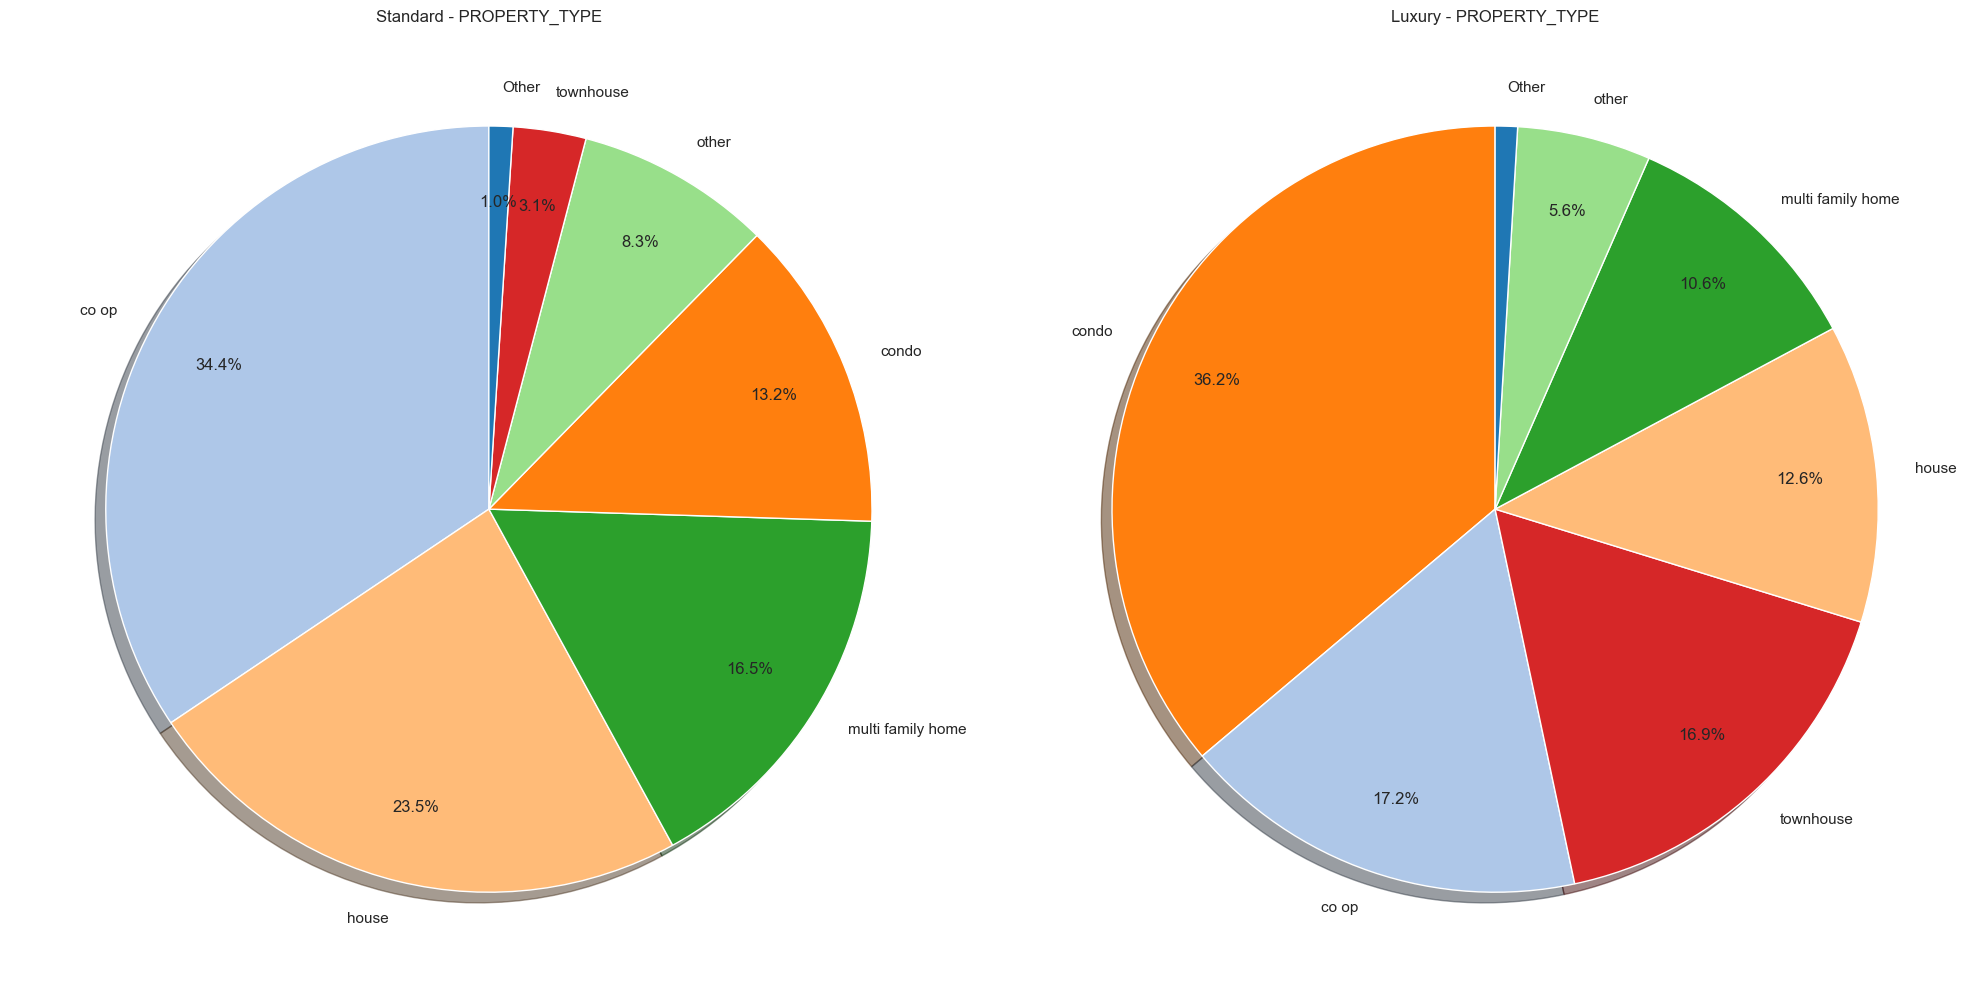

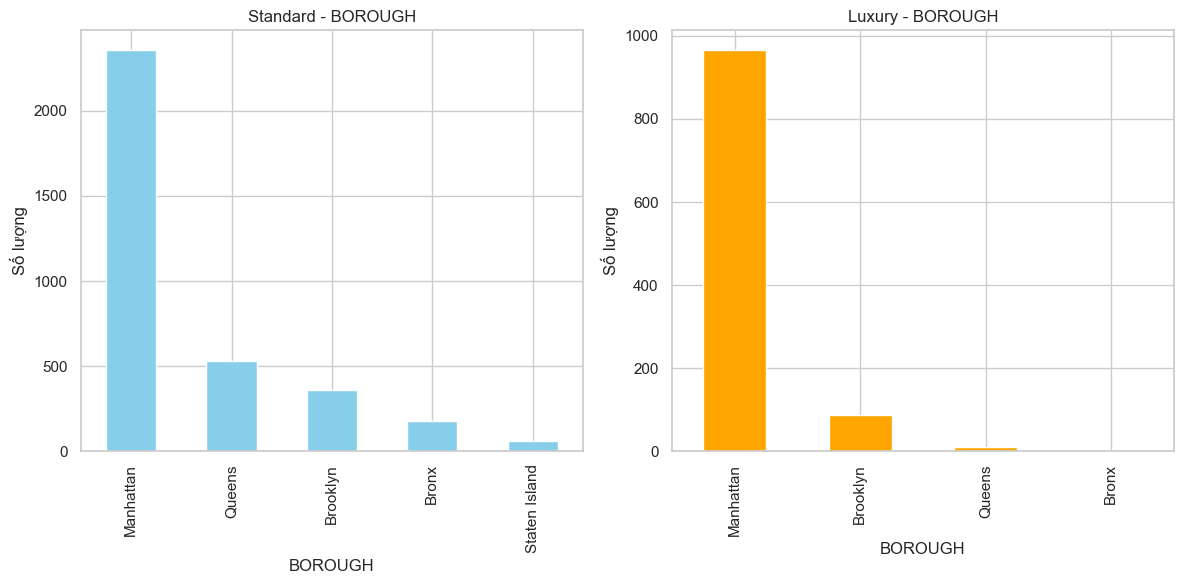

In [579]:
def group_small(df, column, threshold=0.03):
    counts = df[column].value_counts(normalize=True)
    small = counts[counts < threshold].index
    df[column] = df[column].replace(small, 'Other')
    return df

df_normal = group_small(df_normal, 'PROPERTY_TYPE')
df_luxury = group_small(df_luxury, 'PROPERTY_TYPE')

# T·∫°o m√†u c·ªë ƒë·ªãnh cho t·ª´ng category
all_categories = sorted(list(set(df_normal['PROPERTY_TYPE'].unique()) | set(df_luxury['PROPERTY_TYPE'].unique())))
colors = plt.cm.tab20.colors  # l·∫•y 20 m√†u chu·∫©n
color_dict = {cat: colors[i % len(colors)] for i, cat in enumerate(all_categories)}

# H√†m l·ªçc hi·ªÉn th·ªã % >1%
def autopct_filter(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# V·∫Ω 2 pie chart c√πng m√†u cho c√πng category
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_normal_counts = df_normal['PROPERTY_TYPE'].value_counts()
df_normal_counts.plot.pie(
    autopct=autopct_filter,
    ax=axes[0],
    startangle=90,
    shadow=True,
    colors=[color_dict[i] for i in df_normal_counts.index],
    labeldistance=1.1,
    pctdistance=0.8
)
axes[0].set_title("Standard - PROPERTY_TYPE")
axes[0].set_ylabel("")

df_luxury_counts = df_luxury['PROPERTY_TYPE'].value_counts()
df_luxury_counts.plot.pie(
    autopct=autopct_filter,
    ax=axes[1],
    startangle=90,
    shadow=True,
    colors=[color_dict[i] for i in df_luxury_counts.index],
    labeldistance=1.1,
    pctdistance=0.8
)
axes[1].set_title("Luxury - PROPERTY_TYPE")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# 2Ô∏è‚É£ BOROUGH
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_normal['BOROUGH'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("Standard - BOROUGH")
axes[0].set_ylabel("S·ªë l∆∞·ª£ng")

df_luxury['BOROUGH'].value_counts().plot.bar(ax=axes[1], color='orange')
axes[1].set_title("Luxury - BOROUGH")
axes[1].set_ylabel("S·ªë l∆∞·ª£ng")

plt.tight_layout()
plt.show()




### 1. Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n (PROPERTY_TYPE)
- **Standard**: ch·ªß y·∫øu l√† **Co-op (34.4%)** v√† **House (23.6%)** ‚Üí l·ª±a ch·ªçn truy·ªÅn th·ªëng, ph·ªï bi·∫øn.  
- **Luxury**: thi√™n v·ªÅ **Condo (36.2%)** v√† **Townhouse (16.9%)**, cao g·∫•p **3‚Äì5 l·∫ßn t·ª∑ tr·ªçng Standard**.  
- **Co-op** gi·∫£m m·∫°nh (34.4% ‚Üí 17.2%) v√¨ kh√¥ng h·ª£p gu kh√°ch h√†ng gi√†u, v·ªën ∆∞u ti√™n **ri√™ng t∆∞ & to√†n quy·ªÅn s·ªü h·ªØu**.  

üëâ **K·∫øt lu·∫≠n:** Standard = ‚Äúnh√† ·ªü ƒë·∫°i ch√∫ng‚Äù | Luxury = ‚ÄúcƒÉn h·ªô & townhouse sang tr·ªçng‚Äù.

---

### 2. Ph√¢n b·ªë ƒë·ªãa l√Ω (BOROUGH)
- **Manhattan** √°p ƒë·∫£o Luxury (**90.6% vs 67.7% Standard**) ‚Üí trung t√¢m c·ªßa b·∫•t ƒë·ªông s·∫£n h·∫°ng sang.  
- **Queens** (15.3% ‚Üí 1.0%) v√† **Bronx** (5.0% ‚Üí 0.1%) g·∫ßn nh∆∞ bi·∫øn m·∫•t kh·ªèi Luxury ‚Üí s√¢n ch∆°i c·ªßa th·ªã tr∆∞·ªùng t·∫ßm trung.  
- **Brooklyn** gi·ªØ vai tr√≤ trung gian (**10.3% vs 8.3%**) ‚Üí c√≥ s·ª©c h√∫t, nh∆∞ng ch∆∞a c·∫°nh tranh ƒë∆∞·ª£c v·ªõi Manhattan.  

üëâ **K·∫øt lu·∫≠n:** Luxury t·∫≠p trung g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi ·ªü Manhattan; Standard ph√¢n b·ªï ƒëa d·∫°ng h∆°n.

---

### üìå Insight t·ªïng h·ª£p
Luxury kh√¥ng ch·ªâ **‚Äúto h∆°n‚Äù** m√† c√≤n:  
- ·ªû **v·ªã tr√≠ ƒë·∫≥ng c·∫•p h∆°n** (Manhattan)  
- Thu·ªôc **lo·∫°i h√¨nh kh√°c bi·ªát h∆°n** (Condo, Townhouse)  

=> **DNA c·ªßa Luxury = Manhattan + Condo/Townhouse**  
Trong khi ƒë√≥, Standard g·∫Øn v·ªõi **Co-op/House** tr·∫£i r·ªông ·ªü nhi·ªÅu qu·∫≠n.  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1731266631.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



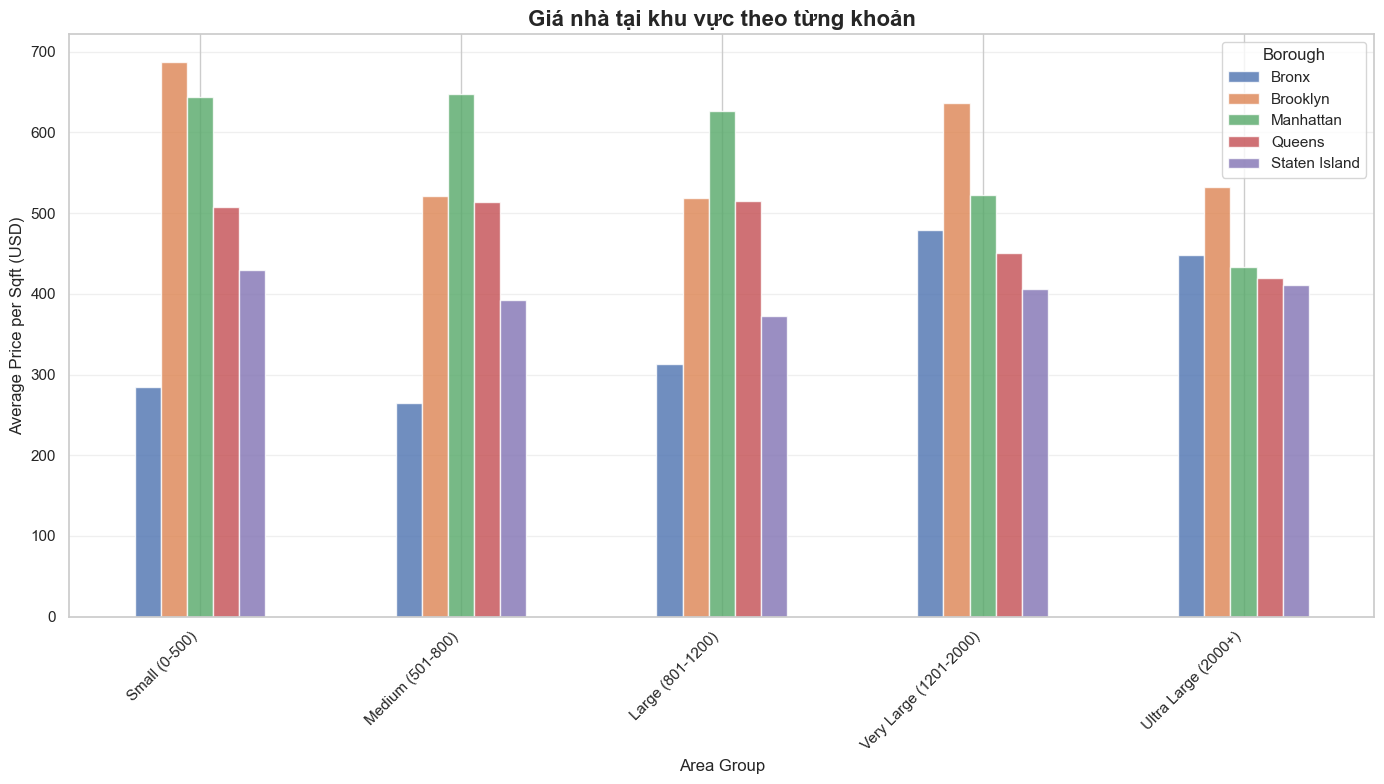

AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                285.00           265.06           313.47   
Brooklyn             687.09           520.85           518.71   
Manhattan            644.32           647.49           626.75   
Queens               507.12           513.93           514.81   
Staten Island        429.24           392.00           372.26   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                         479.59              447.58  
Brooklyn                      636.32              531.95  
Manhattan                     522.84              433.50  
Queens                        450.71              419.13  
Staten Island                 406.43              411.50

In [580]:

df_clean = df_normal.copy()
df_clean['PROPERTYSQFT'] = df_clean['PROPERTYSQFT'].replace(2184.207862, pd.NA)
df_clean['PRICE_PER_SQFT'] = df_clean['PRICE'] / df_clean['PROPERTYSQFT']
df_clean = df_clean.dropna(subset=['PRICE_PER_SQFT'])
df_clean = df_clean[df_clean['PRICE_PER_SQFT'] > 0]

df_clean['AreaGroup'] = pd.cut(
    df_clean['PROPERTYSQFT'],
    bins=[0, 500, 800, 1200, 2000, float('inf')],
    labels=['Small (0-500)', 'Medium (501-800)', 'Large (801-1200)', 
            'Very Large (1201-2000)', 'Ultra Large (2000+)']
)

price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

price_sqft_grouped.T.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title("Gi√° nh√† t·∫°i khu v·ª±c theo t·ª´ng kho·∫£n", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)")
plt.xlabel("Area Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

display(price_sqft_grouped.round(2))


Manhattan & Brooklyn l√† hai th·ªã tr∆∞·ªùng cao c·∫•p nh·∫•t: Gi√° tr√™n m·ªói foot vu√¥ng ($/sqft) c·ªßa hai qu·∫≠n n√†y lu√¥n cao nh·∫•t ·ªü m·ªçi ph√¢n kh√∫c di·ªán t√≠ch, ph·∫£n √°nh s·ª©c h√∫t v√† s·ª± c·∫°nh tranh kh·ªëc li·ªát.

Quy lu·∫≠t "Gi·∫£m gi√° theo di·ªán t√≠ch" (Discount for Bulk): ·ªû h·∫ßu h·∫øt c√°c qu·∫≠n, cƒÉn c√†ng l·ªõn, gi√° m·ªói sqft c√†ng r·∫ª. ƒêi·ªÅu n√†y cho th·∫•y th·ªã tr∆∞·ªùng c√≥ "chi·∫øt kh·∫•u" khi mua di·ªán t√≠ch l·ªõn.

V√≠ d·ª• ƒëi·ªÉn h√¨nh: T·∫°i Manhattan, gi√°/sqft gi·∫£m ~33% t·ª´ nh√≥m "Small" ($644) xu·ªëng "Ultra Large" ($433).

Ngo·∫°i l·ªá ƒë√°ng ch√∫ √Ω: The Bronx l√† qu·∫≠n DUY NH·∫§T c√≥ xu h∆∞·ªõng ng∆∞·ª£c l·∫°i. Gi√°/sqft ·ªü ƒë√¢y tƒÉng m·∫°nh ·ªü c√°c nh√≥m di·ªán t√≠ch l·ªõn. ƒêi·ªÅu n√†y c√≥ th·ªÉ do ngu·ªìn cung c√°c b·∫•t ƒë·ªông s·∫£n l·ªõn, ƒë·∫πp t·∫°i Bronx r·∫•t khan hi·∫øm v√† c√≥ gi√° tr·ªã ƒë·∫ßu t∆∞ cao, trong khi c√°c cƒÉn nh·ªè th∆∞·ªùng l√† c√°c apartment c≈© gi√° r·∫ª.

In [581]:
# Gi√° trung b√¨nh / sqft theo qu·∫≠n & nh√≥m di·ªán t√≠ch
price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

print("Average Price per Sqft by Borough and Area Group:")
print(price_sqft_grouped.round(2))

# T√≠nh t·ª∑ l·ªá % thay ƒë·ªïi gi·ªØa c√°c nh√≥m di·ªán t√≠ch
price_sqft_change = price_sqft_grouped.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                285.00           265.06           313.47   
Brooklyn             687.09           520.85           518.71   
Manhattan            644.32           647.49           626.75   
Queens               507.12           513.93           514.81   
Staten Island        429.24           392.00           372.26   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                         479.59              447.58  
Brooklyn                      636.32              531.95  
Manhattan                     522.84              433.50  
Queens                        450.71              419.13  
Staten Island                 406.43              411.50  

Percentage change compared to previous Area Group:
AreaGroup     Small (0-500)  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\683740668.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\683740668.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\4036172886.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



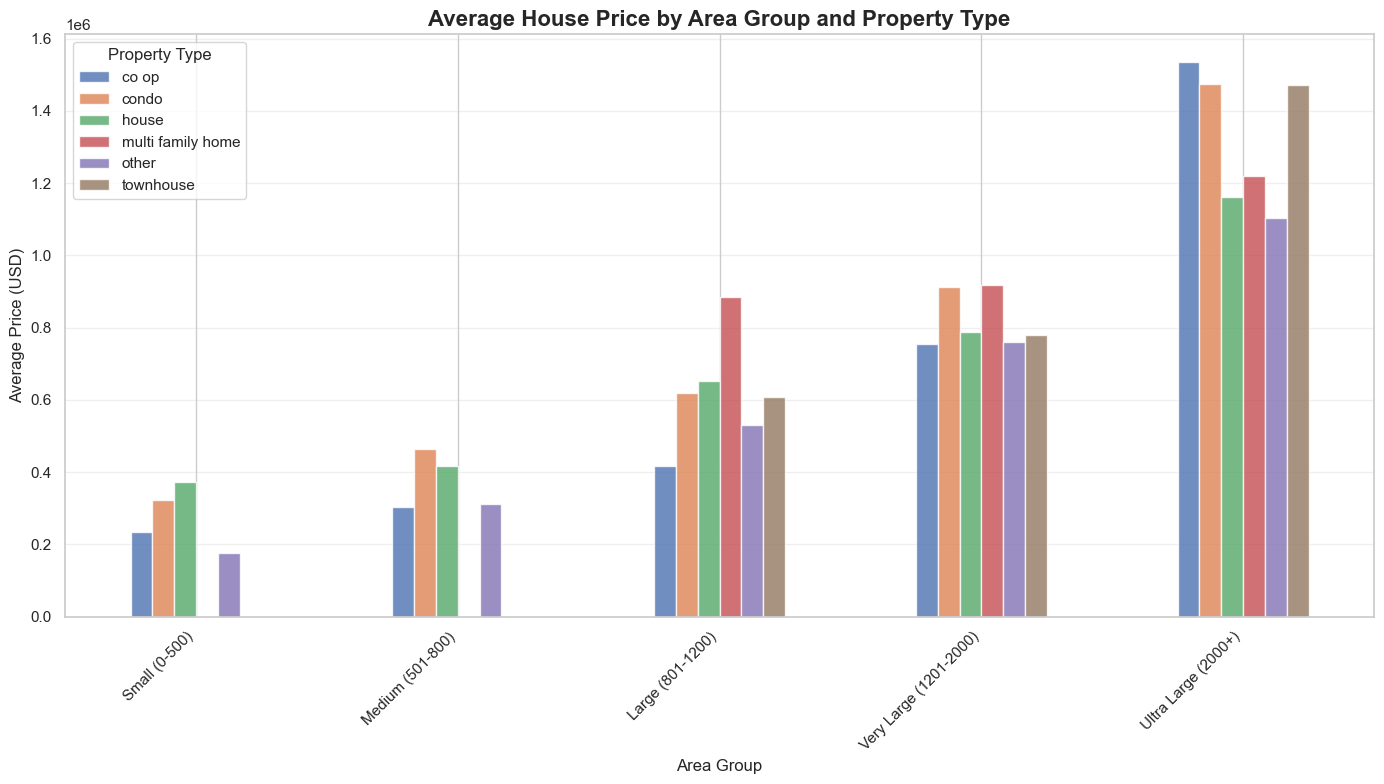

PROPERTY_TYPE                 co op        condo        house  \
AreaGroup                                                       
Small (0-500)            234,433.30   322,153.77   372,500.00   
Medium (501-800)         302,387.93   465,240.37   416,615.23   
Large (801-1200)         417,250.46   618,827.49   651,363.82   
Very Large (1201-2000)   754,788.75   912,139.39   788,461.60   
Ultra Large (2000+)    1,534,875.00 1,473,199.80 1,161,205.61   

PROPERTY_TYPE           multi family home        other    townhouse  
AreaGroup                                                            
Small (0-500)                         NaN   175,647.83          NaN  
Medium (501-800)                      NaN   310,348.56          NaN  
Large (801-1200)               886,000.00   531,481.69   607,979.27  
Very Large (1201-2000)         918,313.79   760,340.07   778,809.58  
Ultra Large (2000+)          1,219,855.86 1,103,081.91 1,471,242.79  


In [582]:

price_by_area_type = df_clean.groupby(['AreaGroup', 'PROPERTY_TYPE'])['PRICE'].mean().unstack()

# v·∫Ω chart
price_by_area_type.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title('Average House Price by Area Group and Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Area Group')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_by_area_type.round(2))


Co-op l√† l·ª±a ch·ªçn ti·∫øt ki·ªám chi ph√≠: ·ªû m·ªçi ph√¢n kh√∫c di·ªán t√≠ch, Co-op lu√¥n c√≥ gi√° trung b√¨nh th·∫•p h∆°n Condo m·ªôt c√°ch r√µ r·ªát. ƒêi·ªÅu n√†y kh·∫≥ng ƒë·ªãnh ƒë·∫∑c ƒëi·ªÉm c·ªßa th·ªã tr∆∞·ªùng NYC: Co-op r·∫ª h∆°n nh∆∞ng ƒëi k√®m nhi·ªÅu quy ƒë·ªãnh ch·∫∑t ch·∫Ω h∆°n.

S·ª± "l√™n ng√¥i" c·ªßa nh√† ri√™ng (House) v√† Multi Family Home ·ªü ph√¢n kh√∫c l·ªõn: ·ªû nh√≥m "Large" tr·ªü l√™n, gi√° c·ªßa House v√† Multi Family Home tƒÉng v·ªçt v√† v∆∞·ª£t qua Condo. ƒêi·ªÅu n√†y cho th·∫•y vi·ªác s·ªü h·ªØu m·ªôt ng√¥i nh√† nguy√™n cƒÉn ho·∫∑c m·ªôt t√≤a nh√† cho thu√™ (m·ªôt d·∫°ng b·∫•t ƒë·ªông s·∫£n ƒë·∫ßu t∆∞) ·ªü NYC c√≥ gi√° tr·ªã r·∫•t l·ªõn v√† l√† ph√¢n kh√∫c c·ªßa c√°c nh√† ƒë·∫ßu t∆∞ ho·∫∑c gia ƒë√¨nh gi√†u c√≥.

In [583]:

print("Average Price per Sqft by Borough and Area Group:")
print(price_by_area_type.round(2))

# T√≠nh t·ª∑ l·ªá % thay ƒë·ªïi gi·ªØa c√°c nh√≥m di·ªán t√≠ch
price_sqft_change = price_by_area_type.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
PROPERTY_TYPE                 co op        condo        house  \
AreaGroup                                                       
Small (0-500)            234,433.30   322,153.77   372,500.00   
Medium (501-800)         302,387.93   465,240.37   416,615.23   
Large (801-1200)         417,250.46   618,827.49   651,363.82   
Very Large (1201-2000)   754,788.75   912,139.39   788,461.60   
Ultra Large (2000+)    1,534,875.00 1,473,199.80 1,161,205.61   

PROPERTY_TYPE           multi family home        other    townhouse  
AreaGroup                                                            
Small (0-500)                         NaN   175,647.83          NaN  
Medium (501-800)                      NaN   310,348.56          NaN  
Large (801-1200)               886,000.00   531,481.69   607,979.27  
Very Large (1201-2000)         918,313.79   760,340.07   778,809.58  
Ultra Large (2000+)          1,219,855.86 1,103,081.91 1,471,242.79  

Per

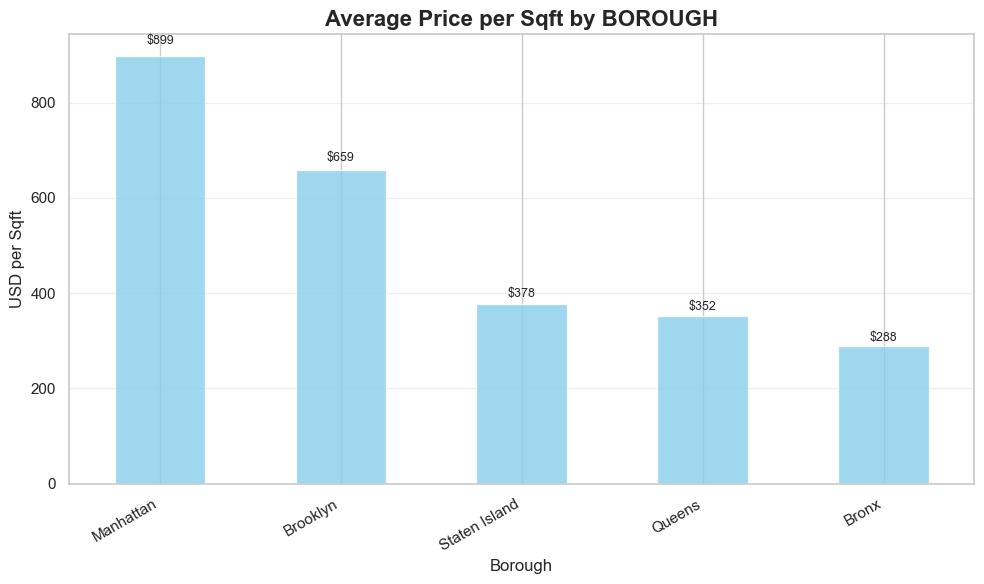

BOROUGH
Manhattan       898.58
Brooklyn        659.08
Staten Island   378.33
Queens          352.07
Bronx           288.40
Name: PRICE_PER_SQFT, dtype: float64


In [584]:
avg_price_sqft_by_borough = df.groupby('BOROUGH')['PRICE_PER_SQFT'].mean().sort_values(ascending=False)

# V·∫Ω bar chart
plt.figure(figsize=(10,6))
avg_price_sqft_by_borough.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Average Price per Sqft by BOROUGH", fontsize=16, fontweight='bold')
plt.ylabel("USD per Sqft", fontsize=12)
plt.xlabel("Borough", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# Th√™m label gi√° tr√™n c·ªôt
for i, val in enumerate(avg_price_sqft_by_borough):
    plt.text(i, val * 1.02, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# In b·∫£ng gi√° trung b√¨nh
print(avg_price_sqft_by_borough.round(2))


## üîç Insight ch√≠nh
1. **Manhattan th·ªëng tr·ªã**: gi√° g·∫•p 3.1 l·∫ßn Bronx, g·∫ßn g·∫•p ƒë√¥i Brooklyn ‚Üí trung t√¢m luxury.  
2. **Brooklyn v∆∞∆°n l√™n premium**: nhi·ªÅu khu gi√° ti·ªám c·∫≠n Manhattan, h√∫t gi·ªõi tr·∫ª & gia ƒë√¨nh kh√° gi·∫£.  
3. **Kho·∫£ng c√°ch l·ªõn**: ch√™nh l·ªách Manhattan ‚Äì Bronx t·ªõi $610/sqft ‚Üí ph·∫£n √°nh r√µ ph√¢n t·∫ßng thu nh·∫≠p & h·∫° t·∫ßng.  
4. **Ba qu·∫≠n ngo·∫°i vi (Queens, Bronx, Staten Island)** gi√° g·∫ßn nhau ($288‚Äì378/sqft) ‚Üí ph√π h·ª£p ng∆∞·ªùi mua l·∫ßn ƒë·∫ßu.  
5. **Ph√¢n kh√∫c r√µ r·ªát**:  
   - Si√™u cao c·∫•p: Manhattan  
   - Cao c·∫•p: Brooklyn  
   - Trung b√¨nh: Staten Island  
   - B√¨nh d√¢n: Queens & Bronx  

---

## üí° Khuy·∫øn ngh·ªã
- **ƒê·∫ßu t∆∞**: Brooklyn c√≥ ti·ªÅm nƒÉng tƒÉng gi√°.  
- **Ng∆∞·ªùi mua ·ªü**: n√™n xem Queens & Bronx.  
- **Ph√°t tri·ªÉn d·ª± √°n**: Staten Island l√† th·ªã tr∆∞·ªùng ti·ªÅm nƒÉng.

C√≥ 96 gi√° tr·ªã di·ªán t√≠ch xu·∫•t hi·ªán t·ª´ 5 l·∫ßn tr·ªü l√™n.
Top 10 di·ªán t√≠ch ph·ªï bi·∫øn nh·∫•t:


PROPERTYSQFT  COUNT
0      2,184.21   1525
1        800.00     53
2        750.00     51
3        900.00     50
4      1,200.00     47
5      1,000.00     40
6        850.00     38
7      1,100.00     38
8      2,000.00     28
9        950.00     28

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1306940514.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




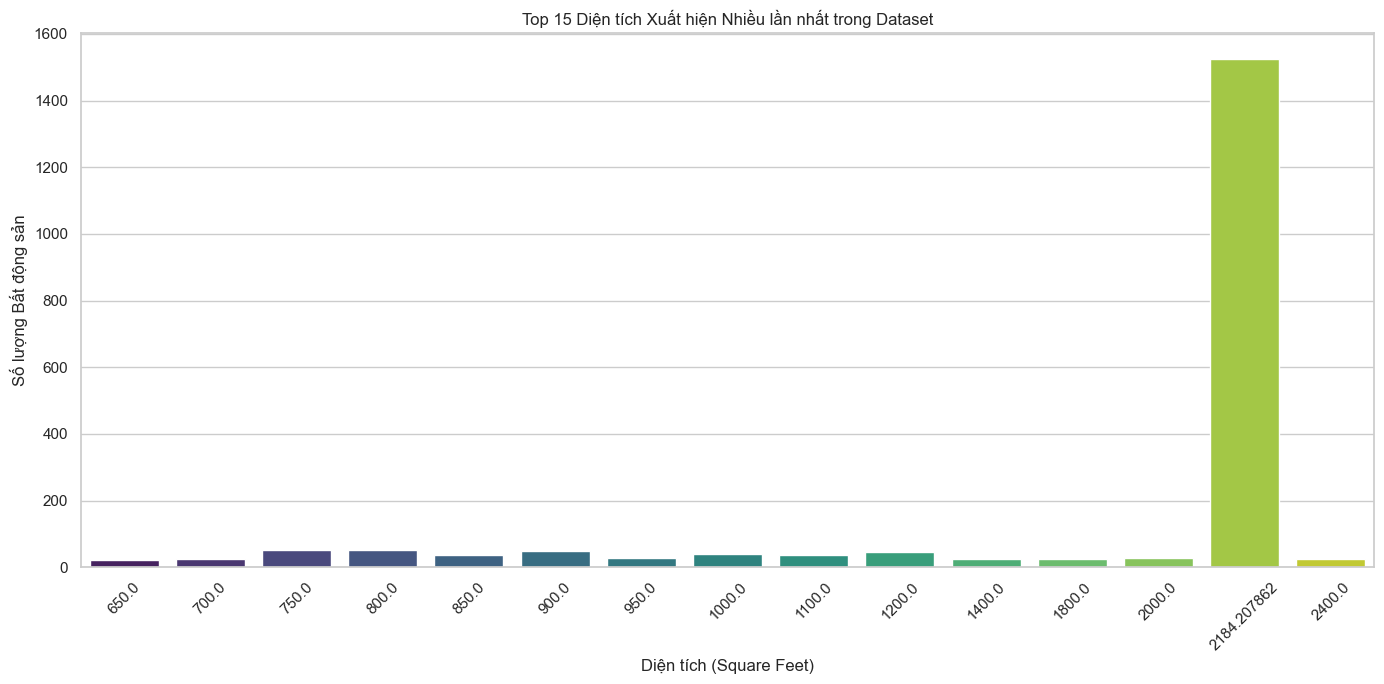

In [585]:
# Ki·ªÉm tra s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã di·ªán t√≠ch tr√πng l·∫∑p
area_frequency = df['PROPERTYSQFT'].value_counts().reset_index()
area_frequency.columns = ['PROPERTYSQFT', 'COUNT']

# L·ªçc ra nh·ªØng di·ªán t√≠ch xu·∫•t hi·ªán nhi·ªÅu l·∫ßn (v√≠ d·ª•: t·ª´ 5 l·∫ßn tr·ªü l√™n)
common_areas = area_frequency[area_frequency['COUNT'] >= 5].sort_values('COUNT', ascending=False)

print(f"C√≥ {len(common_areas)} gi√° tr·ªã di·ªán t√≠ch xu·∫•t hi·ªán t·ª´ 5 l·∫ßn tr·ªü l√™n.")
print("Top 10 di·ªán t√≠ch ph·ªï bi·∫øn nh·∫•t:")
display(common_areas.head(10))

# V·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ tr·ª±c quan h√≥a
plt.figure(figsize=(14, 7))
sns.barplot(data=common_areas.head(15), x='PROPERTYSQFT', y='COUNT', palette="viridis")
plt.title('Top 15 Di·ªán t√≠ch Xu·∫•t hi·ªán Nhi·ªÅu l·∫ßn nh·∫•t trong Dataset')
plt.xlabel('Di·ªán t√≠ch (Square Feet)')
plt.ylabel('S·ªë l∆∞·ª£ng B·∫•t ƒë·ªông s·∫£n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [586]:
# Ch·ªçn m·ªôt di·ªán t√≠ch ph·ªï bi·∫øn ƒë·ªÉ ph√¢n t√≠ch s√¢u (v√≠ d·ª•: 1000 sqft)
target_area = 2184.207862
cluster_df = df[df['PROPERTYSQFT'] == target_area].copy()

print(f"Ph√¢n t√≠ch s√¢u cho c√°c b·∫•t ƒë·ªông s·∫£n c√≥ di·ªán t√≠ch ch√≠nh x√°c {target_area} sqft")
print(f"T·ªïng s·ªë l∆∞·ª£ng: {len(cluster_df)}")
print("\n--- Ph√¢n b·ªë theo LO·∫†I H√åNH (PROPERTY_TYPE) ---")
print(cluster_df['PROPERTY_TYPE'].value_counts())
print("\n--- Ph√¢n b·ªë theo QU·∫¨N ---")
print(cluster_df['BOROUGH'].value_counts())
print("\n--- Ph√¢n b·ªë theo BROKER ---")
display(cluster_df['BROKERTITLE'].value_counts().head())

# Ph√¢n t√≠ch gi√° cho c·ª•m n√†y
print(f"\n--- Th·ªëng k√™ GI√Å cho c·ª•m {target_area} sqft ---")
print(f"Gi√° trung b√¨nh: ${cluster_df['PRICE'].mean():,.0f}")
print(f"Gi√° trung v·ªã: ${cluster_df['PRICE'].median():,.0f}")
print(f"Kho·∫£ng gi√°: ${cluster_df['PRICE'].min():,.0f} - ${cluster_df['PRICE'].max():,.0f}")

Ph√¢n t√≠ch s√¢u cho c√°c b·∫•t ƒë·ªông s·∫£n c√≥ di·ªán t√≠ch ch√≠nh x√°c 2184.207862 sqft
T·ªïng s·ªë l∆∞·ª£ng: 1525

--- Ph√¢n b·ªë theo LO·∫†I H√åNH (PROPERTY_TYPE) ---
PROPERTY_TYPE
co op                713
house                254
multi family home    240
condo                113
other                101
townhouse             60
land                  43
mobile home            1
Name: count, dtype: int64

--- Ph√¢n b·ªë theo QU·∫¨N ---
BOROUGH
Manhattan        1140
Queens            269
Brooklyn           79
Bronx              34
Staten Island       3
Name: count, dtype: int64

--- Ph√¢n b·ªë theo BROKER ---


BROKERTITLE
compass                 163
corcoran                149
douglas elliman         104
keller williams          87
brown harris stevens     79
Name: count, dtype: int64


--- Th·ªëng k√™ GI√Å cho c·ª•m 2184.207862 sqft ---
Gi√° trung b√¨nh: $1,602,810
Gi√° trung v·ªã: $750,000
Kho·∫£ng gi√°: $99,000 - $60,000,000


Ph·∫ßn l·ªõn d·ªØ li·ªáu c·ªßa b·∫°n l√† c√°c b·∫•t ƒë·ªông s·∫£n l·ªõn, hi·∫øm c√≥ ·ªü NYC. Ch√∫ng ch·ªß y·∫øu l√† Co-op ·ªü Manhattan, v·ªõi m·ª©c gi√° th·ª±c t·∫ø ph·ªï bi·∫øn nh·∫•t l√† kho·∫£ng $750,000. Tuy nhi√™n, do l·∫´n v√†o nh·ªØng b·∫•t ƒë·ªông s·∫£n si√™u sang c√≥ gi√° c·∫£ h√†ng ch·ª•c tri·ªáu ƒë√¥, n√™n gi√° trung b√¨nh b·ªã ƒë·∫©y l√™n t·∫≠n $1.6 tri·ªáu v√† kh√¥ng ph·∫£n √°nh ƒë√∫ng gi√° tr·ªã "ƒëi·ªÉn h√¨nh".



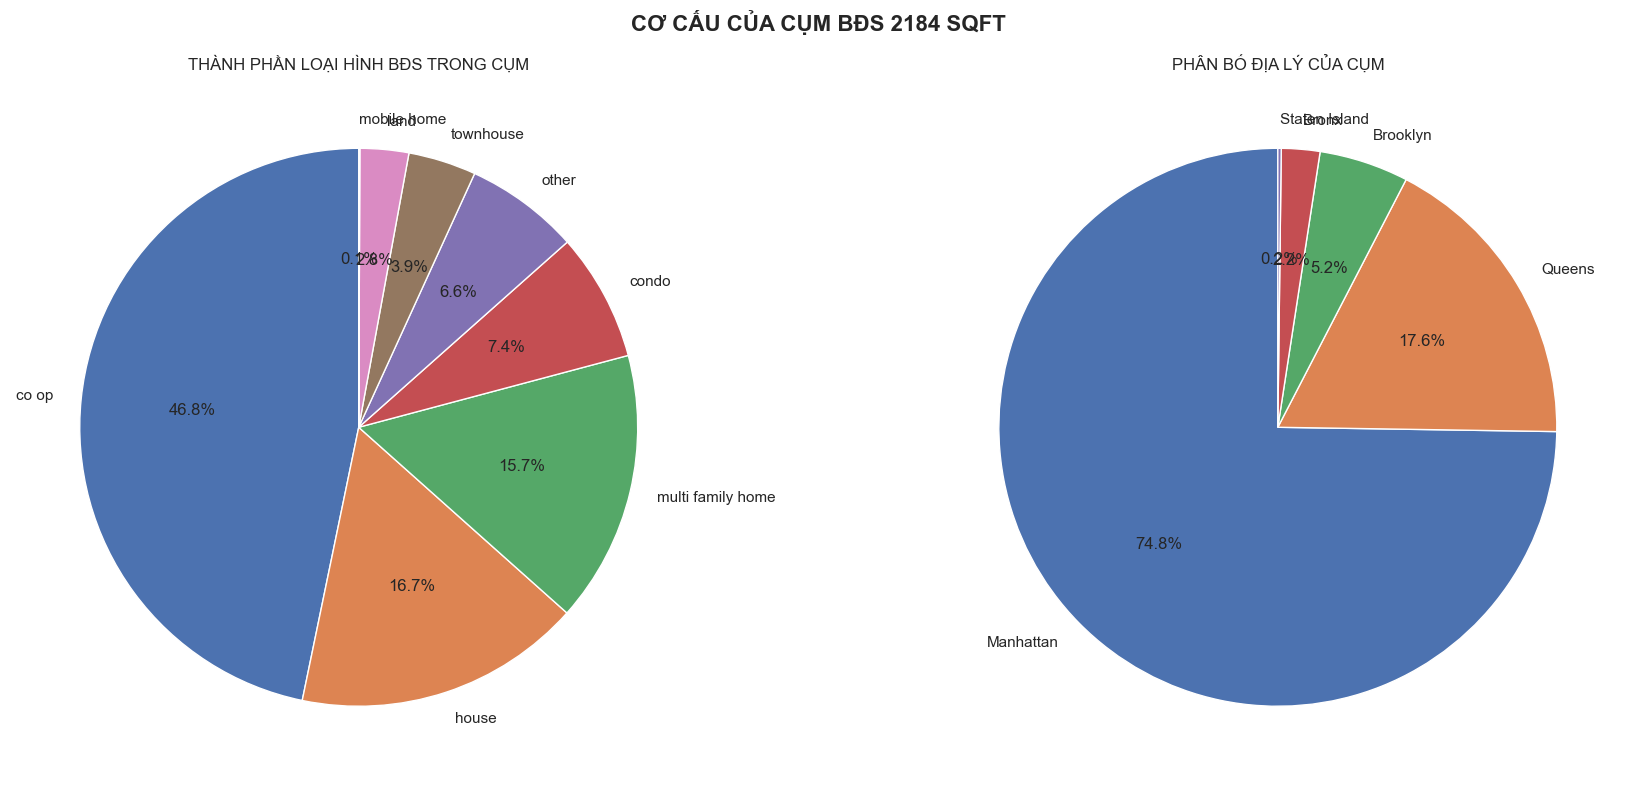

In [587]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart cho lo·∫°i h√¨nh
prop_type_counts = cluster_df['PROPERTY_TYPE'].value_counts()
ax[0].pie(prop_type_counts.values, labels=prop_type_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('TH√ÄNH PH·∫¶N LO·∫†I H√åNH BƒêS TRONG C·ª§M')

# Pie chart cho ph√¢n b·ªë ƒë·ªãa l√Ω
borough_counts = cluster_df['BOROUGH'].value_counts()
ax[1].pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('PH√ÇN B·ªê ƒê·ªäA L√ù C·ª¶A C·ª§M')

plt.suptitle('C∆† C·∫§U C·ª¶A C·ª§M BƒêS 2184 SQFT', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Manhattan th·ªëng tr·ªã ph√¢n kh√∫c l·ªõn: 75% (1140/1525) b·∫•t ƒë·ªông s·∫£n trong nh√≥m di·ªán t√≠ch "l·ªói" n√†y ƒë·∫øn t·ª´ Manhattan. ƒêi·ªÅu n√†y, d√π l√† l·ªói, nh∆∞ng c≈©ng gi√°n ti·∫øp cho th·∫•y Manhattan c√≥ nhi·ªÅu b·∫•t ƒë·ªông s·∫£n c√≥ di·ªán t√≠ch l·ªõn (nh·ªØng cƒÉn penthouse, duplex, ho·∫∑c townhouse ƒë∆∞·ª£c chia nh·ªè) h∆°n c√°c qu·∫≠n kh√°c.

Co-op chi·∫øm ∆∞u th·∫ø: Trong nh√≥m n√†y ·ªü Manhattan, Co-op l√† lo·∫°i h√¨nh ph·ªï bi·∫øn nh·∫•t (713 b·∫£n ghi). ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi th·ª±c t·∫ø l√† c√°c t√≤a nh√† Co-op th∆∞·ªùng l√† nh·ªØng t√≤a nh√† c≈©, c·ªï ƒëi·ªÉn c√≥ c√°c cƒÉn h·ªô v·ªõi m·∫∑t b·∫±ng s√†n r·ªông.



In [588]:
weird_sqft_data = df[df['PROPERTYSQFT'] == 2184.207862]

# Hi·ªÉn th·ªã to√†n b·ªô d·ªØ li·ªáu c·ªßa c√°c h√†ng n√†y
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
print(weird_sqft_data)
pd.reset_option('display.max_rows')  

                                            BROKERTITLE     PRICE  BEDS  BATH  \
3                             nest seekers  long island    325000     1     1   
4                                              du chris    230000     1     1   
7                                               e  corp    275000     1     1   
9                                  brown harris stevens    199900     1     1   
10                                 brown harris stevens    849000     1     1   
13                               monticello real estate    198000     1     1   
20                                             corcoran    550000     1     1   
22                                              compass   2250000     1     1   
23                                            sotheby's    269000     1     1   
24                                              compass    399000     1     1   
29                                   prime  long island    299000     1     1   
35                          

## üîë K·∫øt lu·∫≠n t·ªïng th·ªÉ

1. **Gi√° tr·ªã Luxury kh√¥ng n·∫±m ·ªü di·ªán t√≠ch**  
   - D√π Luxury c√≥ di·ªán t√≠ch l·ªõn h∆°n, nh∆∞ng ph·∫ßn ch√™nh l·ªách gi√° ch·ªß y·∫øu ƒë·∫øn t·ª´ **v·ªã tr√≠ ƒë·∫Øc ƒë·ªãa, t·∫ßm view, ti·ªán √≠ch, th∆∞∆°ng hi·ªáu v√† tr·∫£i nghi·ªám s·ªëng**.  
   - Ng∆∞·ªùi mua Luxury tr·∫£ ti·ªÅn cho **l·ªëi s·ªëng** h∆°n l√† cho ‚Äúm¬≤ s√†n‚Äù.

2. **Ph√≤ng t·∫Øm quan tr·ªçng h∆°n ph√≤ng ng·ªß**  
   - Luxury c√≥ s·ªë ph√≤ng t·∫Øm nhi·ªÅu h∆°n r√µ r·ªát, trong khi s·ªë ph√≤ng ng·ªß kh√¥ng tƒÉng nhi·ªÅu.  
   - ƒêi·ªÅu n√†y cho th·∫•y gi·ªõi th∆∞·ª£ng l∆∞u ∆∞u ti√™n **ti·ªán nghi c√° nh√¢n, s·ª± ri√™ng t∆∞** h∆°n kh·∫£ nƒÉng ch·ª©a nhi·ªÅu ng∆∞·ªùi.

3. **Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n kh√°c bi·ªát**  
   - **Standard** ph·ªï bi·∫øn v·ªõi **Co-op v√† House** ‚Üí l·ª±a ch·ªçn truy·ªÅn th·ªëng, ƒë·∫°i ch√∫ng.  
   - **Luxury** thi√™n v·ªÅ **Condo cao c·∫•p v√† Townhouse** ‚Üí ph√π h·ª£p phong c√°ch s·ªëng hi·ªán ƒë·∫°i, sang tr·ªçng.

4. **Ph√¢n b·ªë ƒë·ªãa l√Ω r√µ r√†ng**  
   - **Manhattan** l√† ‚Äúth·ªß ph·ªß‚Äù c·ªßa Luxury, chi·∫øm g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi.  
   - **Brooklyn** n·ªïi l√™n nh∆∞ th·ªã tr∆∞·ªùng ti·ªÅm nƒÉng, thu h√∫t ng∆∞·ªùi c√≥ thu nh·∫≠p cao nh∆∞ng ch∆∞a ch·∫°m ƒë·∫øn Manhattan.  
   - C√°c qu·∫≠n c√≤n l·∫°i (Queens, Bronx, Staten Island) ch·ªß y·∫øu v·∫´n thu·ªôc th·ªã tr∆∞·ªùng Standard.

5. **Gi√° tr√™n m·ªói m¬≤ l√† th∆∞·ªõc ƒëo ƒë·∫≥ng c·∫•p**  
   - Gi√°/m¬≤ Luxury cao g·∫•p nhi·ªÅu l·∫ßn Standard, kh·∫≥ng ƒë·ªãnh gi√° tr·ªã **kh√¥ng t·ª∑ l·ªá thu·∫≠n v·ªõi di·ªán t√≠ch**.  
   - M·ªói khu v·ª±c c√≥ ‚Äúpremium‚Äù ri√™ng, ph·∫£n √°nh s·ª©c h√∫t v√† m·ª©c s·∫µn s√†ng chi tr·∫£ c·ªßa th·ªã tr∆∞·ªùng.


## ·ª®ng D·ª•ng Th·ª±c T·∫ø T·ª´ Insight B·∫•t ƒê·ªông S·∫£n

### 1. ƒê·ªëi v·ªõi Nh√† ƒê·∫ßu t∆∞ & Ng∆∞·ªùi Mua Nh√†
- **ƒê·ªãnh h∆∞·ªõng ƒë·∫ßu t∆∞:**
  - **An to√†n, thanh kho·∫£n cao** ‚Üí ch·ªçn **Standard** (Co-op, House) ·ªü **Brooklyn, Queens**. Th·ªã tr∆∞·ªùng ƒë·∫°i ch√∫ng, √≠t bi·∫øn ƒë·ªông, d·ªÖ mua b√°n.  
  - **L·ª£i nhu·∫≠n cao, ch·∫•p nh·∫≠n r·ªßi ro** ‚Üí nh·∫Øm **Condo cao c·∫•p** ·ªü **Manhattan**. Gi√° bi·∫øn ƒë·ªông l·ªõn, ti·ªÅm nƒÉng tƒÉng nh·ªù v·ªã tr√≠ + th∆∞∆°ng hi·ªáu.  

- **Quy·∫øt ƒë·ªãnh mua th√¥ng minh:**
  - **ƒê·ª´ng ch·ªâ nh√¨n di·ªán t√≠ch:** 100m¬≤ ·ªü Manhattan ƒë·∫Øt g·∫•p 3‚Äì4 l·∫ßn Queens ‚Üí ng√¢n s√°ch **∆∞u ti√™n v·ªã tr√≠ h∆°n di·ªán t√≠ch**.  
  - **∆Øu ti√™n ph√≤ng t·∫Øm:** Nh√† 3 ph√≤ng ng·ªß + 3 ph√≤ng t·∫Øm c√≥ gi√° tr·ªã h∆°n 4 ph√≤ng ng·ªß + 2 ph√≤ng t·∫Øm ‚Üí d·ªÖ cho thu√™/b√°n.  

---

### 2. ƒê·ªëi v·ªõi Nh√† M√¥i gi·ªõi & Ch·ªß ƒê·∫ßu t∆∞
- **Chi·∫øn l∆∞·ª£c marketing:**
  - **Luxury** ‚Üí nh·∫•n m·∫°nh **view, ti·ªán √≠ch (pool, gym, b·∫£o v·ªá 24/7), ƒë·ªãa ch·ªâ ƒë·∫Øc ƒë·ªãa** ‚Üí b√°n ‚Äúl·ªëi s·ªëng‚Äù.  
  - **Standard** ‚Üí t·∫≠p trung v√†o **gi√° tr·ªã th·ª±c, c√¥ng nƒÉng, ti·∫øt ki·ªám chi ph√≠**.  

- **ƒê·ªãnh gi√° s·∫£n ph·∫©m:**
  - Tr√°nh c·∫£m t√≠nh ‚Üí d√πng **m√¥ h√¨nh h·ªìi quy ƒëa bi·∫øn** (qu·∫≠n, lo·∫°i h√¨nh, di·ªán t√≠ch, s·ªë ph√≤ng).  
  - T√¨m c∆° h·ªôi ‚Äúh·ªùi‚Äù ‚Üí ph√°t hi·ªán b·∫•t ƒë·ªông s·∫£n **ƒëang b√°n d∆∞·ªõi gi√° tr·ªã trung b√¨nh** sau khi lo·∫°i b·ªè outlier.  

---


## 2.2. Multivariate Analysis

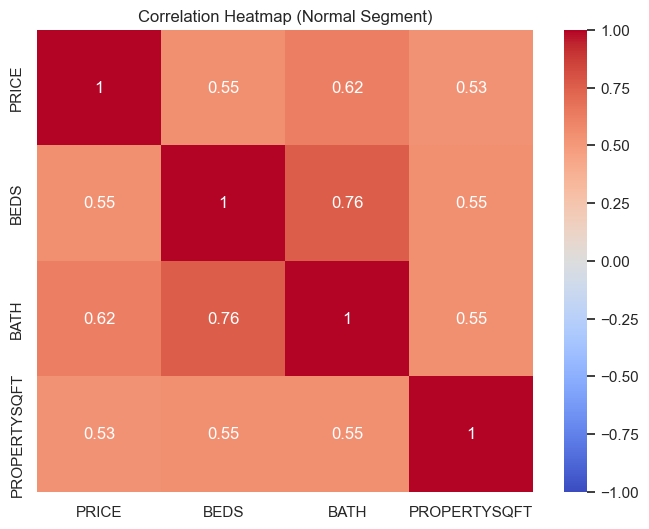

In [589]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr_matrix = df_numeric.corr()

# V·∫Ω heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\2020753829.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



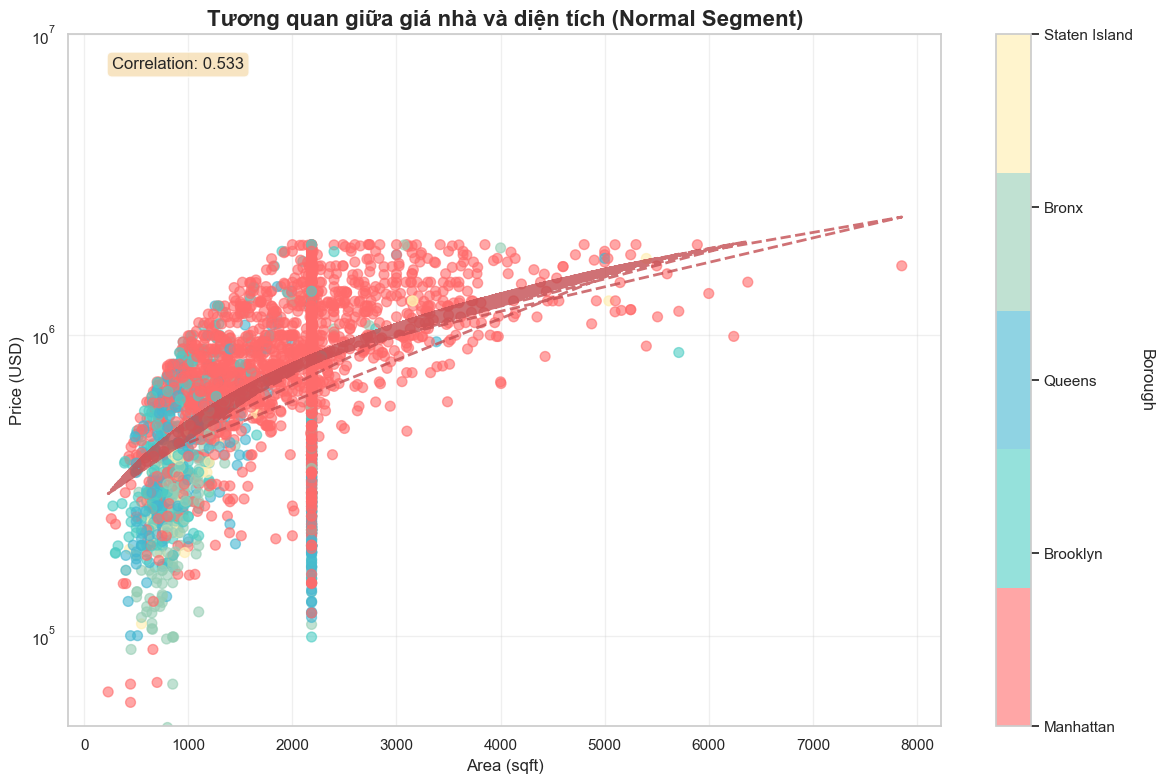

In [590]:
import matplotlib.colors  
borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # M√†u c·ªë ƒë·ªãnh

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Th√™m h·ªá s·ªë t∆∞∆°ng quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Th√™m colorbar v·ªõi nh√£n r·ªùi r·∫°c
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('T∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

In [ ]:
import statsmodels.api as sm

X_lux = sm.add_constant(df_luxury['PROPERTYSQFT'])
y_lux = df_luxury['PRICE']
model_lux = sm.OLS(y_lux, X_lux).fit()

print("=== Luxury ===")
print(model_lux.summary())

coef_sqft_lux = model_lux.params['PROPERTYSQFT']
print(f"Luxury: M·ªói 1 sqft tƒÉng, gi√° tƒÉng kho·∫£ng ${coef_sqft_lux:,.2f}\n")


=== Luxury ===
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           2.48e-33
Time:                        07:28:23   Log-Likelihood:                -18530.
No. Observations:                1065   AIC:                         3.706e+04
Df Residuals:                    1063   BIC:                         3.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.139e+06   3.39e+0

In [592]:

X_std = sm.add_constant(df_normal['PROPERTYSQFT'])
y_std = df_normal['PRICE']
model_std = sm.OLS(y_std, X_std).fit()

print("=== Standard ===")
print(model_std.summary())

coef_sqft_std = model_std.params['PROPERTYSQFT']
print(f"Standard: M·ªói 1 sqft tƒÉng, gi√° tƒÉng kho·∫£ng ${coef_sqft_std:,.2f}")


=== Standard ===
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1376.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          4.12e-254
Time:                        07:28:23   Log-Likelihood:                -49474.
No. Observations:                3478   AIC:                         9.895e+04
Df Residuals:                    3476   BIC:                         9.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.312e+05   1.53e

## Ph√¢n t√≠ch H·ªìi quy: ·∫¢nh h∆∞·ªüng c·ªßa Di·ªán t√≠ch ƒë·∫øn Gi√° Nh√†

### 1. Luxury Segment
- **Intercept (const) ‚âà $3,139,000** ‚Üí m·ª©c gi√° c∆° b·∫£n ngay c·∫£ khi di·ªán t√≠ch = 0.  
- **H·ªá s·ªë PROPERTYSQFT ‚âà $774.34** ‚Üí m·ªói 1 sqft tƒÉng, gi√° tƒÉng trung b√¨nh **$774**.  
- **R¬≤ = 0.127** ‚Üí di·ªán t√≠ch ch·ªâ gi·∫£i th√≠ch ~12.7% bi·∫øn ƒë·ªông gi√°.  
  ‚Üí Ngo√†i di·ªán t√≠ch, **v·ªã tr√≠, ti·ªán nghi, view, th∆∞∆°ng hi·ªáu** quy·∫øt ƒë·ªãnh ph·∫ßn l·ªõn gi√° Luxury.  

### 2. Standard Segment
- **H·ªá s·ªë PROPERTYSQFT ‚âà $242.50** ‚Üí m·ªói 1 sqft tƒÉng, gi√° tƒÉng trung b√¨nh **$243**.  
- **R¬≤ cao h∆°n Luxury** ‚Üí gi√° Standard ph·ª• thu·ªôc di·ªán t√≠ch nhi·ªÅu h∆°n, √≠t ch·ªãu ·∫£nh h∆∞·ªüng c·ªßa y·∫øu t·ªë ‚Äúpremium‚Äù.  

### 3. So s√°nh & Insight
- **Luxury: $774/sqft vs Standard: $243/sqft** ‚Üí Luxury tr·∫£ g·∫•p ~3 l·∫ßn cho di·ªán t√≠ch.  
- **Standard**: quan h·ªá di·ªán t√≠ch‚Äìgi√° **ƒë∆°n gi·∫£n, d·ªÖ d·ª± b√°o**.  
- **Luxury**: di·ªán t√≠ch ch·ªâ l√† 1 ph·∫ßn, gi√° c√≤n ch·ªãu t√°c ƒë·ªông m·∫°nh t·ª´ **v·ªã tr√≠ & ti·ªán √≠ch cao c·∫•p**.  

üí° **K·∫øt lu·∫≠n:** Ng∆∞·ªùi mua **Luxury** tr·∫£ nhi·ªÅu h∆°n cho di·ªán t√≠ch, nh∆∞ng th·ª±c ch·∫•t h·ªç ƒëang tr·∫£ cho **lifestyle & gi√° tr·ªã v√¥ h√¨nh**. Trong khi ƒë√≥, ng∆∞·ªùi mua **Standard** t·∫≠p trung v√†o **di·ªán t√≠ch & c√¥ng nƒÉng s·ª≠ d·ª•ng**.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\889349862.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



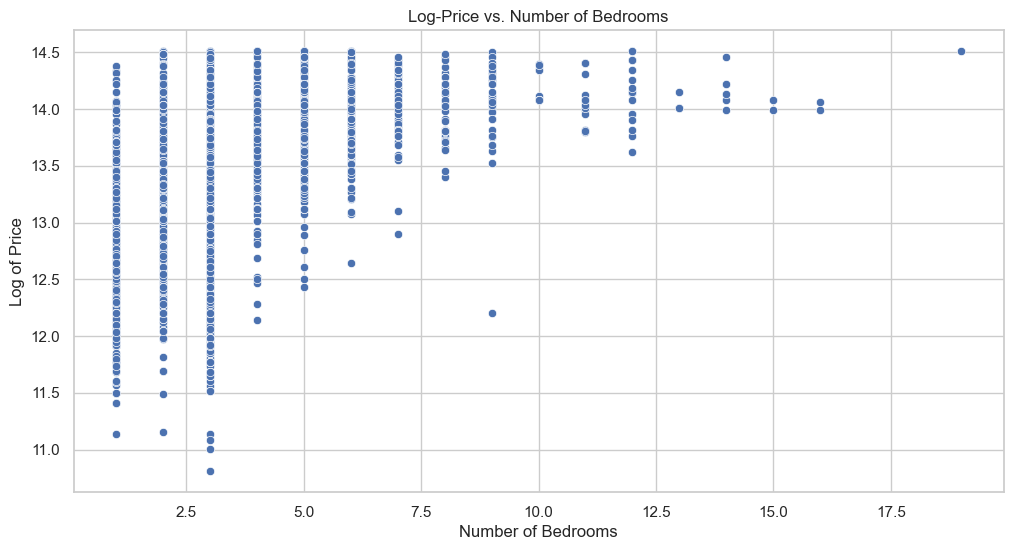

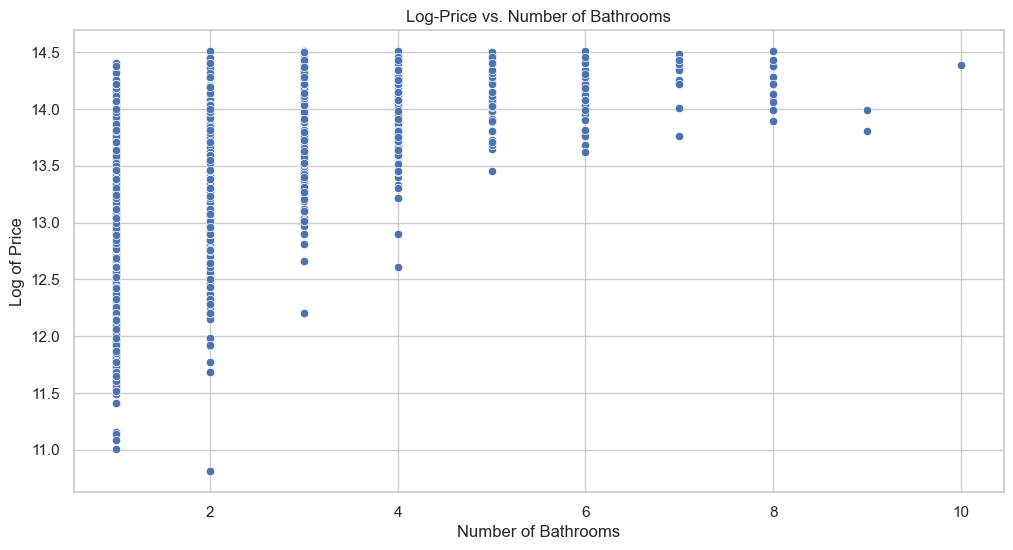

0.5233494602219808 0.5978788204082377


In [593]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [619]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1638238194.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1638238194.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




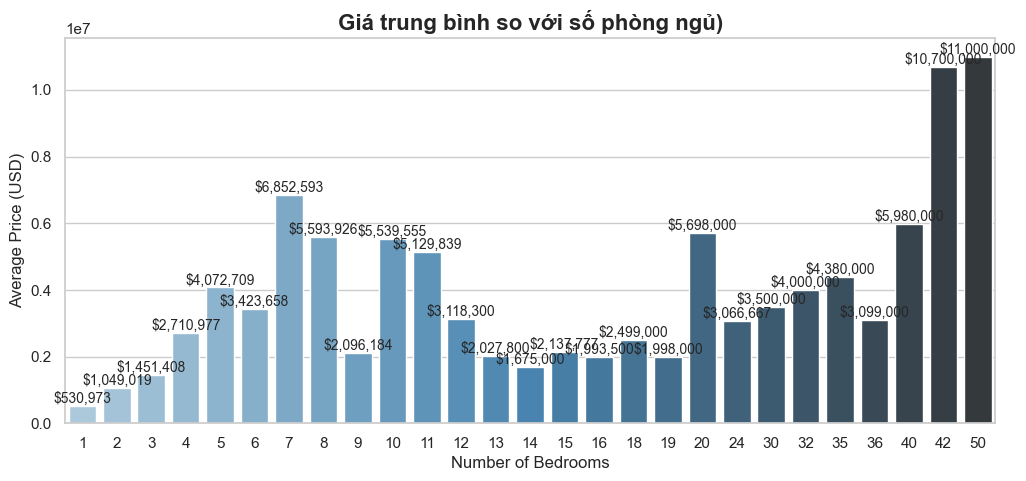

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1638238194.py:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1638238194.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




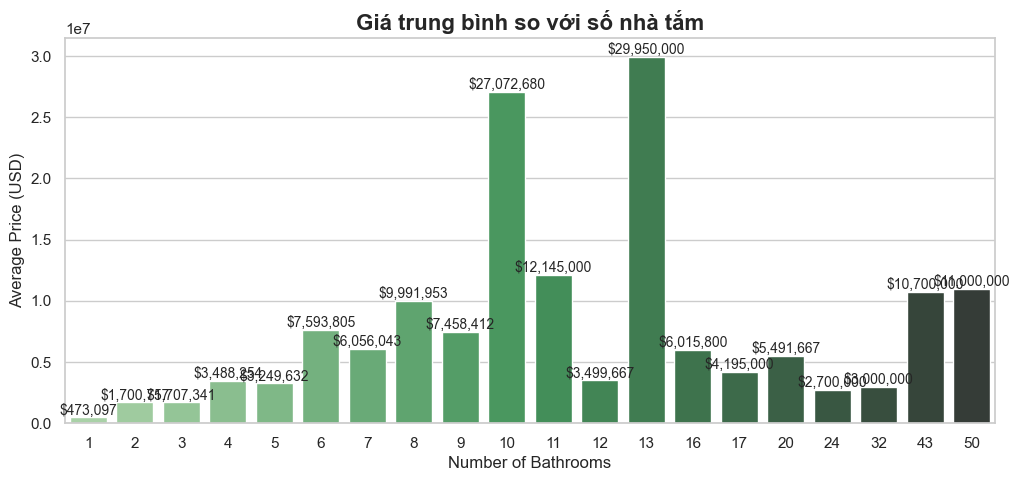

In [623]:


sns.set(style="whitegrid")

# --- Bar plot trung b√¨nh gi√° theo s·ªë ph√≤ng ng·ªß ---
plt.figure(figsize=(12,5))
ax = sns.barplot(x='BEDS', y='PRICE', data=df, palette='Blues_d', ci=None)
plt.title("Gi√° trung b√¨nh so v·ªõi s·ªë ph√≤ng ng·ªß)", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price (USD)")

# Th√™m gi√° ti·ªÅn tr√™n c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,  # ƒë·∫∑t label cao h∆°n c·ªôt
            s=f"${height:,.0f}", 
            ha='center', va='bottom', fontsize=10)

plt.show()


# --- Bar plot trung b√¨nh gi√° theo s·ªë ph√≤ng t·∫Øm ---
plt.figure(figsize=(12,5))
ax = sns.barplot(x='BATH', y='PRICE', data=df, palette='Greens_d', ci=None)
plt.title("Gi√° trung b√¨nh so v·ªõi s·ªë nh√† t·∫Øm", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price (USD)")

# Th√™m gi√° ti·ªÅn tr√™n c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=10)

plt.show()


In [596]:
# T√≠nh gi√° trung b√¨nh theo s·ªë ph√≤ng ng·ªß v√† ph√≤ng t·∫Øm
avg_price_by_beds = df.groupby('BEDS')['PRICE'].mean()
avg_price_by_bath = df.groupby('BATH')['PRICE'].mean()

# In ra k·∫øt qu·∫£ gi·ªëng v√≠ d·ª• tr∆∞·ªõc
print("Average Price by Number of Bedrooms:")
print(avg_price_by_beds.round(2))

print("\nAverage Price by Number of Bathrooms:")
display(avg_price_by_bath.round(2))


Average Price by Number of Bedrooms:
BEDS
1       530,973.09
2     1,049,018.88
3     1,451,407.88
4     2,710,976.63
5     4,072,708.92
6     3,423,657.62
7     6,852,592.79
8     5,593,925.57
9     2,096,184.16
10    5,539,555.43
11    5,129,838.80
12    3,118,299.85
13    2,027,800.00
14    1,675,000.00
15    2,137,777.40
16    1,993,500.00
18    2,499,000.00
19    1,998,000.00
20    5,698,000.00
24    3,066,666.67
30    3,500,000.00
32    4,000,000.00
35    4,380,000.00
36    3,099,000.00
40    5,980,000.00
42   10,700,000.00
50   11,000,000.00
Name: PRICE, dtype: float64

Average Price by Number of Bathrooms:


BATH
1       473,096.77
2     1,700,757.45
3     1,707,340.79
4     3,488,254.47
5     3,249,632.40
6     7,593,804.76
7     6,056,043.48
8     9,991,953.49
9     7,458,412.43
10   27,072,680.50
11   12,145,000.00
12    3,499,666.67
13   29,950,000.00
16    6,015,800.00
17    4,195,000.00
20    5,491,666.67
24    2,700,000.00
32    3,000,000.00
43   10,700,000.00
50   11,000,000.00
Name: PRICE, dtype: float64

## üìä Insight v·ªÅ ·∫¢nh h∆∞·ªüng c·ªßa BEDS & BATH ƒë·∫øn Gi√° Nh√†

---

### üîπ Insight 1: Ph√≤ng t·∫Øm (BATH) quan tr·ªçng h∆°n Ph√≤ng ng·ªß (BEDS)
- **1 ‚Üí 2 ph√≤ng t·∫Øm**: gi√° tƒÉng t·ª´ **$473K ‚Üí $1.7M** (~+260%).  
- **1 ‚Üí 2 ph√≤ng ng·ªß**: gi√° tƒÉng t·ª´ **$530K ‚Üí $1.05M** (~+100%).  

üëâ Th·ªã tr∆∞·ªùng tr·∫£ premium l·ªõn h∆°n cho **ti·ªán nghi & ri√™ng t∆∞** ‚Üí ph√≤ng t·∫Øm l√† y·∫øu t·ªë ƒë·ªãnh gi√° m·∫°nh.

---

### üîπ Insight 2: Quy lu·∫≠t ‚ÄúL·ª£i t·ª©c gi·∫£m d·∫ßn‚Äù (Diminishing Returns)
- **BEDS**: tƒÉng ƒë·∫øn 4 ph√≤ng ng·ªß th√¨ h·ª£p l√Ω, sau ƒë√≥ bi·∫øn ƒë·ªông th·∫•t th∆∞·ªùng ‚Üí nhu c·∫ßu >4 ph√≤ng ng·ªß th·∫•p, kh√¥ng ·ªïn ƒë·ªãnh.  
- **BATH**: gi√° v·∫´n tƒÉng ƒë·ªÅu t·ªõi 10 ph√≤ng t·∫Øm (~$27M) ‚Üí v·ªõi ph√¢n kh√∫c si√™u sang, ph√≤ng t·∫Øm v·∫´n t·∫°o gi√° tr·ªã.

---

### üîπ Insight 3: Ba ph√¢n kh√∫c th·ªã tr∆∞·ªùng r√µ r√†ng
1. **Ph·ªï th√¥ng**: 1‚Äì2 BEDS, 1‚Äì2 BATH ‚Üí < $1.7M.  
2. **Trung & Cao c·∫•p**: 3‚Äì4 BEDS, 3‚Äì4 BATH ‚Üí $1.4M ‚Äì $3.5M.  
3. **Si√™u sang**: 5+ BEDS, 5+ BATH ‚Üí $3.2M ‚Äì $30M.  
   - Bi·∫øn ƒë·ªông r·∫•t cao, gi√° ph·ª• thu·ªôc v√†o **v·ªã tr√≠, view, th∆∞∆°ng hi·ªáu** h∆°n l√† s·ªë ph√≤ng.

---

### üîπ Insight 4: ‚Äúƒêu√¥i d√†i‚Äù ƒë·∫∑c th√π c·ªßa NYC
- T·ªìn t·∫°i nh√† c√≥ **10, 20, th·∫≠m ch√≠ 50 ph√≤ng t·∫Øm**.  
- ƒê√¢y l√† d·∫•u hi·ªáu c·ªßa **th·ªã tr∆∞·ªùng si√™u cao c·∫•p** (penthouse, dinh th·ª±, kh√°ch s·∫°n c·∫£i t·∫°o).

---

### üí° ·ª®ng d·ª•ng & Khuy·∫øn ngh·ªã
- **Ng∆∞·ªùi b√°n / Nh√† ph√°t tri·ªÉn**:  
  - ƒê·∫ßu t∆∞ v√†o **ph√≤ng t·∫Øm** h∆°n l√† th√™m ph√≤ng ng·ªß.  
  - C·∫£i t·∫°o n√™n ∆∞u ti√™n th√™m **bathroom** ƒë·ªÉ tƒÉng gi√° tr·ªã.  

- **Ng∆∞·ªùi mua / Nh√† ƒë·∫ßu t∆∞**:  
  - < $1.7M ‚Üí t·∫≠p trung v√†o 1‚Äì2 BEDS, 1‚Äì2 BATH (thanh kho·∫£n cao).  
  - $1.5M ‚Äì $3.5M ‚Üí t·ªëi ∆∞u 3‚Äì4 BEDS, 3‚Äì4 BATH.  
  - C·∫©n tr·ªçng v·ªõi ph√¢n kh√∫c **si√™u sang** (5+ BEDS/BATH) v√¨ gi√° bi·∫øn ƒë·ªông m·∫°nh.  

- **M√¥i gi·ªõi BƒêS**:  
  - Marketing c·∫ßn **nh·∫•n m·∫°nh s·ªë ph√≤ng t·∫Øm** ngang ho·∫∑c h∆°n s·ªë ph√≤ng ng·ªß.  
  - Gi√∫p kh√°ch h√†ng hi·ªÉu r√µ quy lu·∫≠t **diminishing returns** ƒë·ªÉ ƒë·∫∑t k·ª≥ v·ªçng gi√° h·ª£p l√Ω.


In [597]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:")
print(price_range_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:")
print(average_price_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:")
print(total_listings_per_broker.head())

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:
                              min      max       median
BROKERTITLE                                            
brick mortar              1995000  1995000 1,995,000.00
excellent                  468000  1990000 1,990,000.00
rubirosa                  1900000  1900000 1,900,000.00
myc  inc                  1900000  1900000 1,900,000.00
garfield leslie j co inc  1900000  1900000 1,900,000.00

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:
BROKERTITLE
brick mortar               1,995,000.00
rubirosa                   1,900,000.00
garfield leslie j co inc   1,900,000.00
exit team                  1,900,000.00
myc  inc                   1,900,000.00
Name: PRICE, dtype: float64

C√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:
BROKERTITLE
compass            259
re/max             246
keller williams    195
corcoran           174
douglas elliman    167
Name: count, dtype: int64


In [598]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\784580992.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Ph√¢n t√≠ch Broker (Nh√† m√¥i gi·ªõi)

In [599]:
import plotly.express as px

# Chu·∫©n h√≥a t√™n broker
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")
df_luxury['BROKERTITLE'] = df_luxury['BROKERTITLE'].str.replace("Brokered by ", "")

# Top 10 broker m·ªói ph√¢n kh√∫c
top_std = df_normal['BROKERTITLE'].value_counts().nlargest(10)
top_lux = df_luxury['BROKERTITLE'].value_counts().nlargest(10)

# Union c√°c broker ƒë·ªÉ kh√¥ng b·ªè ai
top_brokers = pd.Index(top_std.index).union(top_lux.index)

# L·∫•y s·ªë listings cho t·ª´ng broker trong union
counts_std_top = df_normal['BROKERTITLE'].value_counts().reindex(top_brokers, fill_value=0)
counts_lux_top = df_luxury['BROKERTITLE'].value_counts().reindex(top_brokers, fill_value=0)

# Gh√©p dataframe
top_brokers_df = pd.DataFrame({
    'BROKERTITLE': top_brokers,
    'Standard': counts_std_top.values,
    'Luxury': counts_lux_top.values
})

# Melt sang long format
top_brokers_long = top_brokers_df.melt(id_vars='BROKERTITLE', 
                                       value_vars=['Standard','Luxury'],
                                       var_name='Segment', value_name='Listings')

# V·∫Ω bi·ªÉu ƒë·ªì
fig = px.bar(top_brokers_long, x='BROKERTITLE', y='Listings', color='Segment', barmode='group',
             text='Listings', title="Top Brokers: Standard vs Luxury")
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\447821468.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\447821468.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [617]:
top_brokers_luxury = df_luxury['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers_luxury.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers_luxury, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" C√°c nh√† m√¥i gi·ªõi luxury h√†ng ƒë·∫ßu theo s·ªë l∆∞·ª£ng ni√™m y·∫øt",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [615]:
top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" C√°c nh√† m√¥i gi·ªõi nh√† normal h√†ng ƒë·∫ßu theo s·ªë l∆∞·ª£ng ni√™m y·∫øt",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [614]:
display(top_brokers)
display(top_brokers_luxury)

BROKERTITLE  LISTINGS_COUNT
0               compass             259
1                re/max             246
2       keller williams             195
3              corcoran             174
4       douglas elliman             167
5                   exp             106
6  brown harris stevens              92
7           winzone inc              60
8       coldwell banker              58
9    robert defalco inc              56

BROKERTITLE  LISTINGS_COUNT
0                compass             193
1               corcoran             180
2        douglas elliman             123
3   brown harris stevens              70
4              sotheby's              69
5                serhant              40
6                 re/max              22
7        keller williams              21
8  nest seekers  midtown              17
9        coldwell banker              16

## üéØ Khuy·∫øn ngh·ªã Chi·∫øn l∆∞·ª£c

### üîπ ƒê·ªëi v·ªõi Ng∆∞·ªùi mua/B√°n
- **Luxury**: N√™n ch·ªçn c√°c broker c√≥ **chuy√™n m√¥n s√¢u v√† uy t√≠n l√¢u nƒÉm** nh∆∞ Corcoran, Douglas Elliman, Brown Harris Stevens. H·ªç s·ªü h·ªØu **network kh√°ch h√†ng cao c·∫•p**, kh·∫£ nƒÉng marketing tinh t·∫ø v√† kinh nghi·ªám x·ª≠ l√Ω giao d·ªãch ph·ª©c t·∫°p.  
- **Standard**: Compass, RE/MAX v√† Keller Williams l√† l·ª±a ch·ªçn ph√π h·ª£p nh·ªù **ƒë·ªô ph·ªß r·ªông**, s·ªë l∆∞·ª£ng listing l·ªõn v√† quy tr√¨nh b√°n h√†ng t·ªëi ∆∞u, gi√∫p giao d·ªãch nhanh h∆°n v√† gi√° h·ª£p l√Ω.

### üîπ ƒê·ªëi v·ªõi Broker mu·ªën ph√°t tri·ªÉn
- **Standard**: C·∫ßn ∆∞u ti√™n **scale v√† c√¥ng ngh·ªá**. M√¥ h√¨nh franchise (nh∆∞ RE/MAX) ho·∫∑c h·ªá th·ªëng agent r·ªông (nh∆∞ Keller Williams) v·∫´n hi·ªáu qu·∫£, nh∆∞ng ph·∫£i ƒë·∫ßu t∆∞ m·∫°nh v√†o n·ªÅn t·∫£ng d·ªØ li·ªáu v√† marketing s·ªë ƒë·ªÉ gi·ªØ th·ªã ph·∫ßn.  
- **Luxury**: Th√†nh c√¥ng ph·ª• thu·ªôc v√†o **th∆∞∆°ng hi·ªáu v√† s·ª± kh√°c bi·ªát c√° nh√¢n**. C√°c broker n√™n t·∫≠p trung x√¢y d·ª±ng h√¨nh ·∫£nh uy t√≠n, tuy·ªÉn d·ª•ng **celebrity agents**, v√† khai th√°c c√°c **th·ªã tr∆∞·ªùng ng√°ch** (v√≠ d·ª•: new developments, penthouse, waterfront).

### üîπ ƒê·ªëi v·ªõi Nh√† ƒë·∫ßu t∆∞
- **Compass** l√† case study ƒë√°ng ch√∫ √Ω: v·ª´a th·ªëng tr·ªã Standard v·ª´a v∆∞∆°n m·∫°nh ·ªü Luxury ‚Üí ch·ª©ng minh hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh **data-driven + c√¥ng ngh·ªá + th∆∞∆°ng hi·ªáu m·∫°nh**.  
- Broker truy·ªÅn th·ªëng nh∆∞ RE/MAX, Keller Williams g·∫∑p kh√≥ ·ªü Luxury ‚Üí g·ª£i √Ω r·∫±ng **th∆∞∆°ng hi·ªáu ƒë·∫°i ch√∫ng kh√¥ng d·ªÖ chuy·ªÉn sang th·ªã tr∆∞·ªùng cao c·∫•p** n·∫øu kh√¥ng t√°i ƒë·ªãnh v·ªã v√† ƒë·∫ßu t∆∞ h√¨nh ·∫£nh.

---

## ‚úÖ K·∫øt lu·∫≠n
Th·ªã tr∆∞·ªùng BƒêS NYC c√≥ s·ª± **ph√¢n t·∫ßng r√µ r·ªát gi·ªØa Standard v√† Luxury**:  
- **Standard** thi√™n v·ªÅ quy m√¥, volume, v√† m·∫°ng l∆∞·ªõi ph√¢n ph·ªëi r·ªông.  
- **Luxury** thi√™n v·ªÅ th∆∞∆°ng hi·ªáu, uy t√≠n c√° nh√¢n v√† t√≠nh chuy√™n bi·ªát.  

üëâ Th√†nh c√¥ng ·ªü ph√¢n kh√∫c n√†y **kh√¥ng ƒë·∫£m b·∫£o** th√†nh c√¥ng ·ªü ph√¢n kh√∫c kia.  
Ch·ªâ nh·ªØng broker nh∆∞ Compass, bi·∫øt c√°ch **k·∫øt h·ª£p c√¥ng ngh·ªá, th∆∞∆°ng hi·ªáu v√† chi·∫øn l∆∞·ª£c ph√π h·ª£p t·ª´ng ph√¢n kh√∫c**, m·ªõi c√≥ th·ªÉ chi·∫øm ∆∞u th·∫ø to√†n di·ªán.  


In [602]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Gi√° trung b√¨nh c·ªßa c√°c ƒë∆°n v·ªã ƒë∆∞·ª£c m√¥i gi·ªõi b·ªüi 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_luxury[df_luxury['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Gi√° trung b√¨nh c·ªßa c√°c ƒë∆°n v·ªã ƒë∆∞·ª£c m√¥i gi·ªõi b·ªüi 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [603]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Ph√¢n b·ªë ƒë·ªãa l√Ω c·ªßa 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu tr√™n kh·∫Øp c√°c ƒë·ªãa ph∆∞∆°ng kh√°c nhau",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [604]:
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Ph√¢n b·ªë ƒë·ªãa l√Ω c·ªßa 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\4247372228.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [605]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean',          
}).reset_index()

print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT  BEDS  BATH
0  brown harris stevens      1,758.13  2.04  1.54
1       coldwell banker      1,935.88  3.28  2.22
2               compass      1,905.78  2.52  1.69
3              corcoran      1,711.50  2.16  1.53
4       douglas elliman      1,869.84  2.49  1.75
5                   exp      1,663.13  3.21  1.92
6       keller williams      1,816.88  2.96  1.83
7                re/max      1,782.05  3.57  2.31
8    robert defalco inc      1,909.38  3.59  2.41
9           winzone inc      1,820.60  3.13  1.92


## luxury analyst


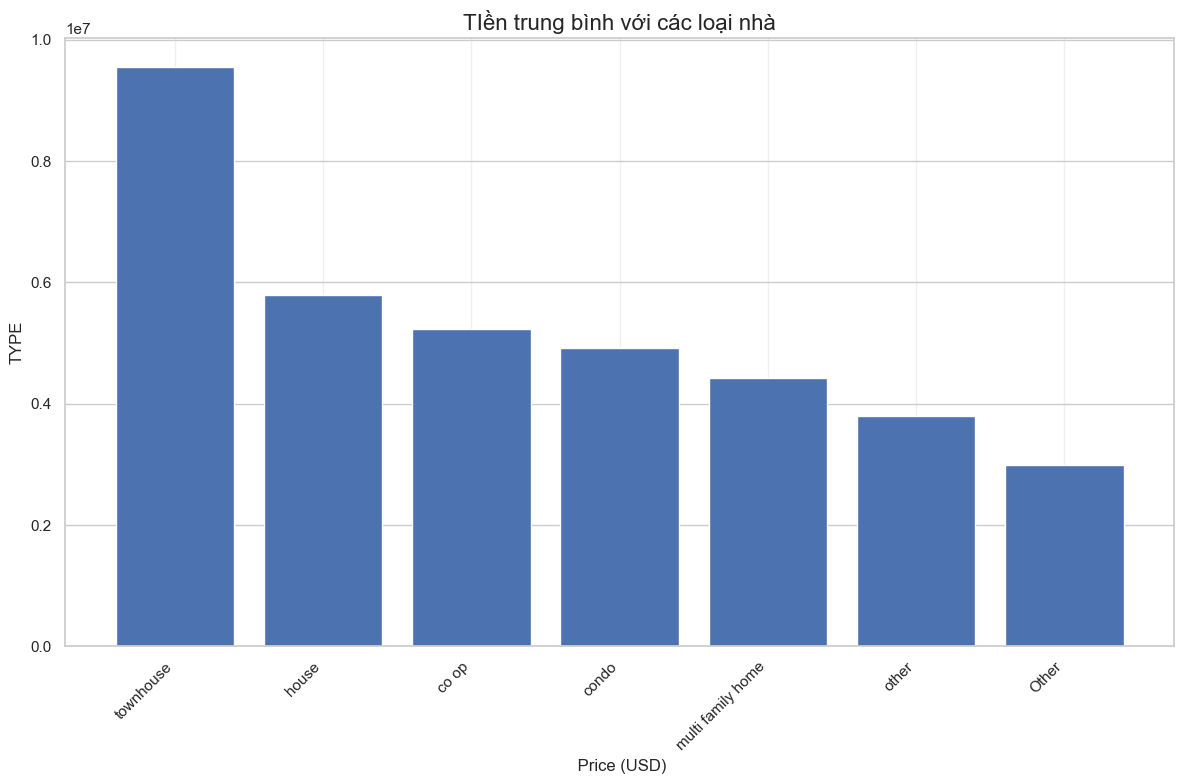

In [606]:
avg_type = df_luxury.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TI·ªÅn trung b√¨nh v·ªõi c√°c lo·∫°i nh√†', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

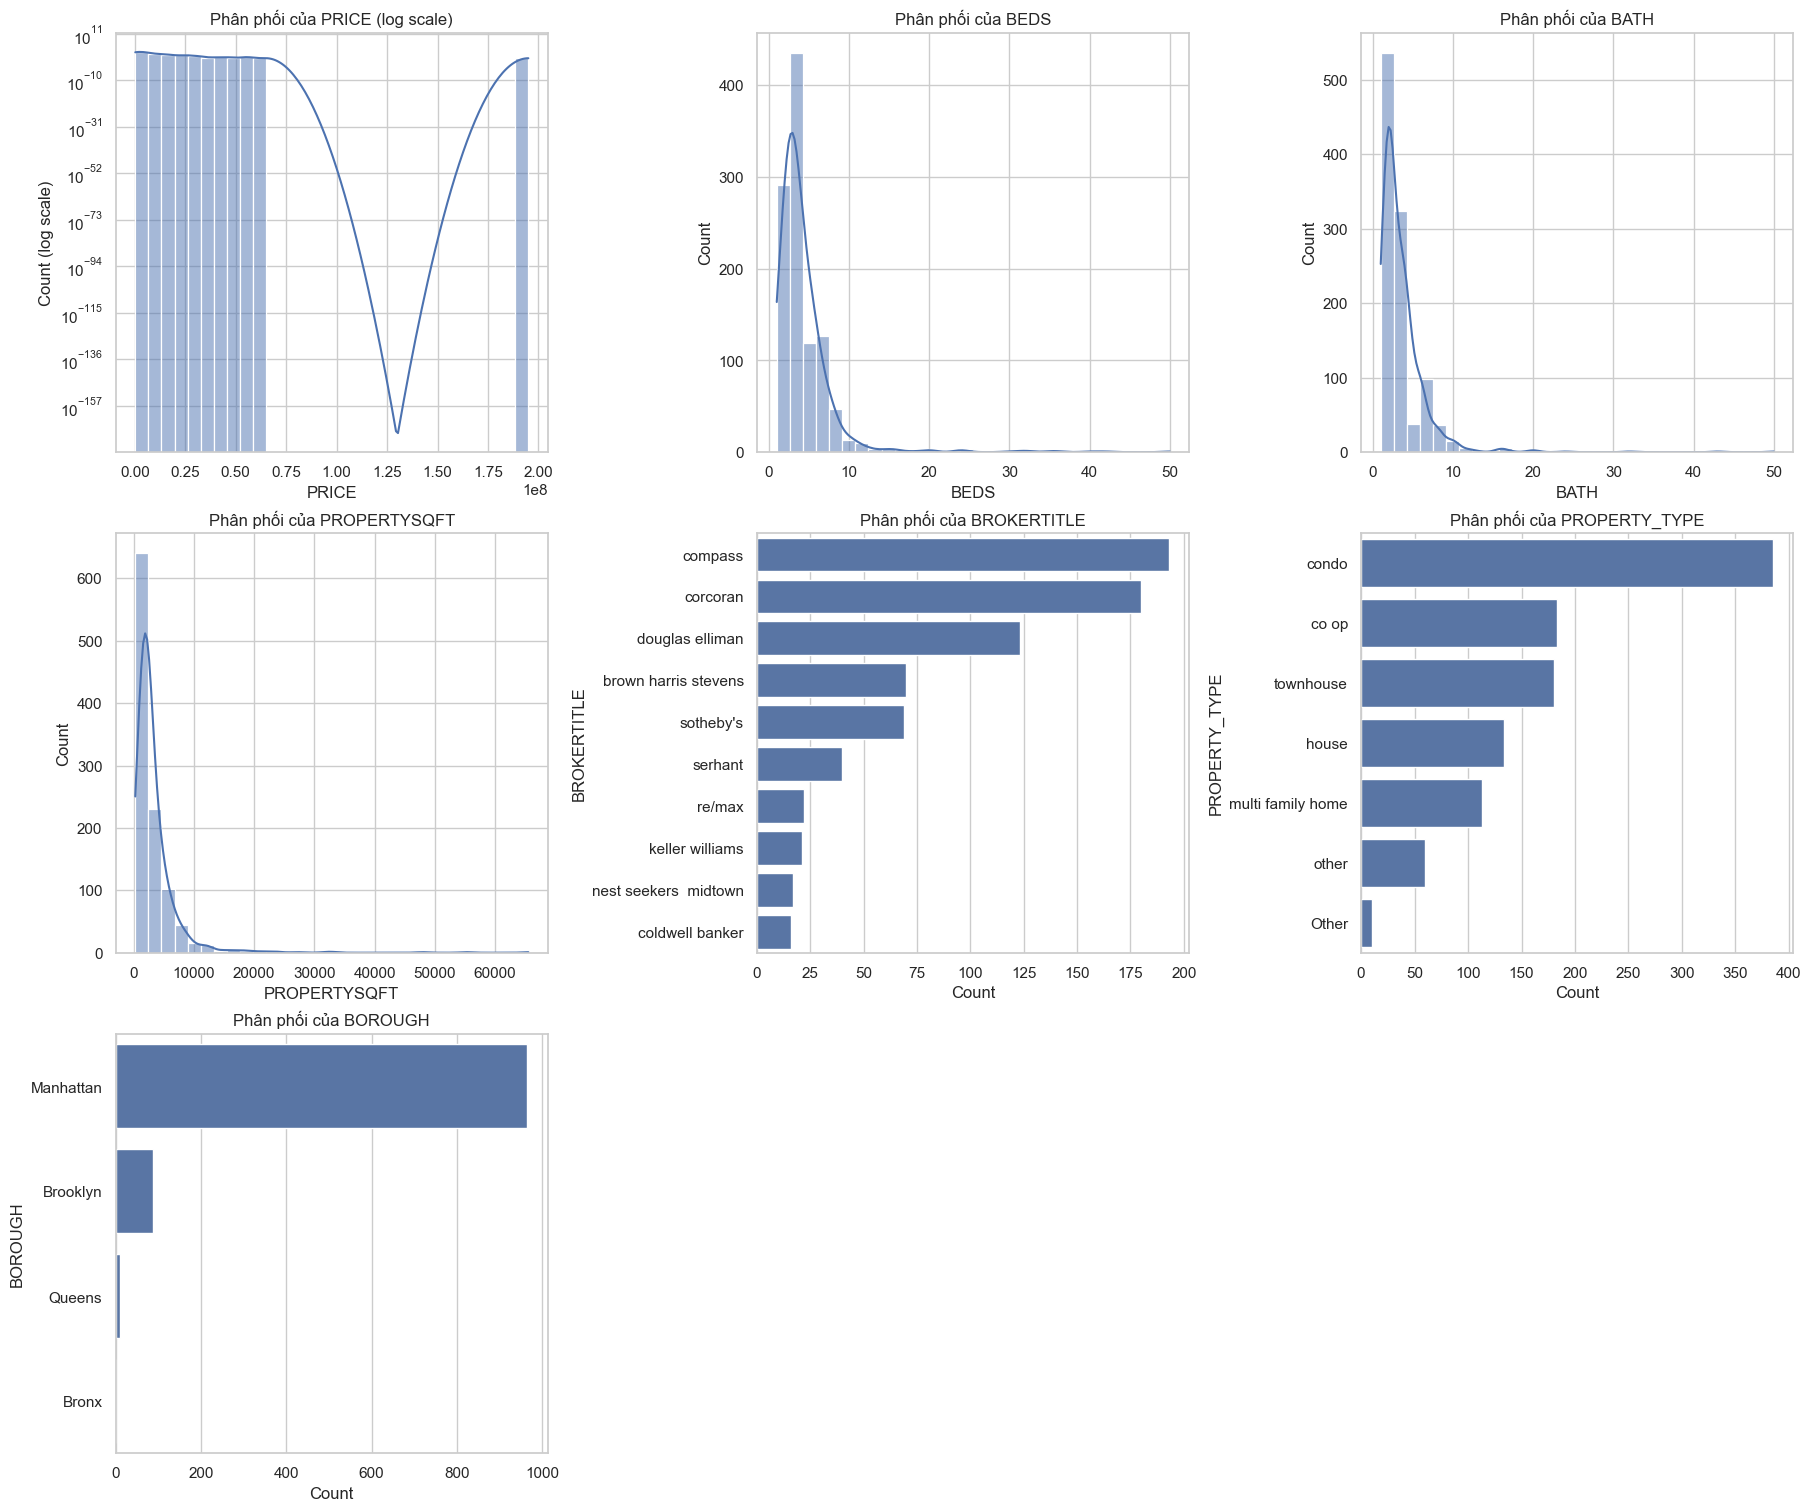

In [607]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1. Ph√¢n ph·ªëi gi√° nh√† (PRICE)
- Gi√° nh√† luxury tr·∫£i r·ªông t·ª´ **5M ƒë·∫øn g·∫ßn 200M USD**.  
- Ph√¢n ph·ªëi l·ªách ph·∫£i, nh∆∞ng kh√°c v·ªõi Normal, ph·∫ßn ƒëu√¥i k√©o d√†i t·ªõi h√†ng trƒÉm tri·ªáu USD.  
- Xu·∫•t hi·ªán r√µ r·ªát m·ªôt s·ªë **cƒÉn si√™u sang (super luxury)** tr√™n 50M, k√©o trung b√¨nh gi√° l√™n cao.  

### 2. Ph√¢n ph·ªëi s·ªë ph√≤ng ng·ªß (BEDS)
- Ph·ªï bi·∫øn t·ª´ **3‚Äì6 ph√≤ng ng·ªß**.  
- Xu·∫•t hi·ªán m·ªôt s·ªë cƒÉn bi·ªát th·ª±/townhouse c√≥ **10+ ph√≤ng ng·ªß**, hi·∫øm nh∆∞ng ƒë·∫∑c tr∆∞ng cho ph√¢n kh√∫c n√†y.  

### 3. Ph√¢n ph·ªëi s·ªë ph√≤ng t·∫Øm (BATH)
- ƒêa s·ªë c√≥ **3‚Äì6 ph√≤ng t·∫Øm**, ƒëi k√®m v·ªõi s·ªë ph√≤ng ng·ªß l·ªõn.  
- M·ªôt s·ªë √≠t tr∆∞·ªùng h·ª£p c·ª±c ƒëoan c√≥ tr√™n 10 ph√≤ng t·∫Øm ‚Üí bi·ªát th·ª± ho·∫∑c cƒÉn h·ªô penthouse nhi·ªÅu t·∫ßng.  

### 4. Ph√¢n ph·ªëi di·ªán t√≠ch (PROPERTYSQFT)
- Luxury ch·ªß y·∫øu t·ª´ **3,000 ‚Äì 10,000 sqft**.  
- M·ªôt s·ªë cƒÉn c·ª±c l·ªõn tr√™n **20,000 sqft**, th∆∞·ªùng l√† bi·ªát th·ª± ho·∫∑c penthouse.  

### 5. Ph√¢n ph·ªëi theo m√¥i gi·ªõi (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** d·∫´n ƒë·∫ßu s·ªë l∆∞·ª£ng listing luxury.  
- C√°c m√¥i gi·ªõi chuy√™n ph√¢n kh√∫c cao c·∫•p kh√°c: **Serhant, Sotheby‚Äôs, Brown Harris Stevens**.  
- Th·ªã tr∆∞·ªùng luxury t·∫≠p trung trong tay m·ªôt s·ªë √≠t broker uy t√≠n, mang t√≠nh chuy√™n bi·ªát cao.  

### 6. Ph√¢n ph·ªëi theo lo·∫°i nh√† (PROPERTY_TYPE)
- Luxury t·∫≠p trung nhi·ªÅu nh·∫•t v√†o **condo cao c·∫•p v√† townhouse**.  
- House ƒë∆°n l·∫≠p v√† co-op c√≥ nh∆∞ng √≠t h∆°n.  
- Multi-family home h·∫ßu nh∆∞ kh√¥ng xu·∫•t hi·ªán trong luxury.  

### 7. Ph√¢n ph·ªëi theo khu v·ª±c (BOROUGH)
- **Manhattan √°p ƒë·∫£o g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi**, ch·ªâ m·ªôt ph·∫ßn r·∫•t nh·ªè luxury ·ªü Brooklyn.  
- Kh√¥ng c√≥ luxury ·ªü Queens, Bronx hay Staten Island.  

---

#### üîë Insight ch√≠nh t·ª´ ph√¢n t√≠ch ƒë∆°n bi·∫øn Luxury Segment
1. **Luxury ·ªü NYC g·∫ßn nh∆∞ ƒë·ªìng nghƒ©a v·ªõi Manhattan**, n∆°i t·∫≠p trung to√†n b·ªô ngu·ªìn cung cao c·∫•p.  
2. Gi√° dao ƒë·ªông r·ªông, t·ª´ **5M ‚Äì 200M USD**, v·ªõi m·ªôt s·ªë si√™u ph·∫©m k√©o ph√¢n ph·ªëi l√™n c·ª±c ƒëoan.  
3. ƒê·∫∑c ƒëi·ªÉm cƒÉn h·ªô luxury: **di·ªán t√≠ch l·ªõn (3,000‚Äì10,000 sqft), nhi·ªÅu ph√≤ng (3‚Äì6 ph√≤ng ng·ªß, 3‚Äì6 ph√≤ng t·∫Øm)**.  
4. Th·ªã tr∆∞·ªùng ƒë∆∞·ª£c chi ph·ªëi b·ªüi **m·ªôt nh√≥m broker cao c·∫•p**, n·ªïi b·∫≠t l√† Compass, Douglas Elliman, Corcoran, Serhant v√† Sotheby‚Äôs.  
5. **Condo & townhouse** l√† h√¨nh th·ª©c ch√≠nh c·ªßa luxury, ph·∫£n √°nh ƒë·∫∑c th√π ƒë√¥ th·ªã Manhattan.  

‚û°Ô∏è Luxury segment t·∫°i NYC c√≥ t√≠nh t·∫≠p trung c·ª±c cao v·ªÅ c·∫£ **ƒë·ªãa l√Ω (Manhattan)** l·∫´n **broker**. ƒê√¢y l√† th·ªã tr∆∞·ªùng kh√°c bi·ªát ho√†n to√†n so v·ªõi Normal segment, ph·ª•c v·ª• nh√≥m kh√°ch h√†ng si√™u gi√†u.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1141401786.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



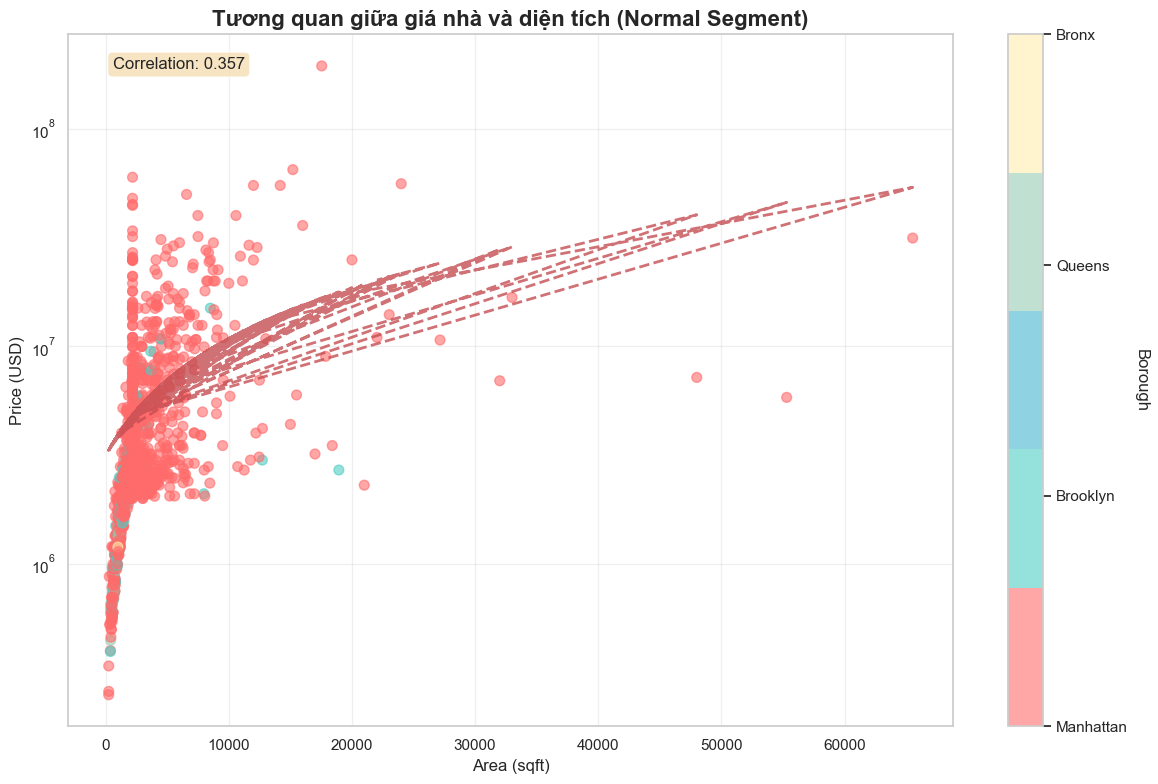

In [608]:


# N·∫øu ch·ªâ mu·ªën Manhattan, l·ªçc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # M√†u c·ªë ƒë·ªãnh

df_luxury['BOROUGH_CODE'] = df_luxury['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], alpha=0.6, 
                      c=df_luxury['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng
z = np.polyfit(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_luxury['PROPERTYSQFT'], p(df_luxury['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Th√™m h·ªá s·ªë t∆∞∆°ng quan
correlation = df_luxury[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Th√™m colorbar v·ªõi nh√£n r·ªùi r·∫°c
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('T∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
# plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\3798432295.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



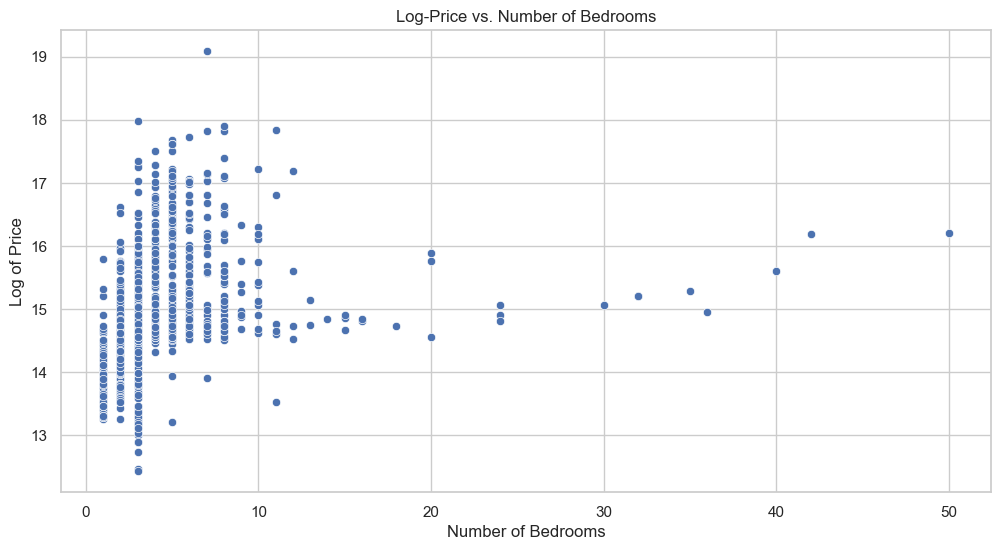

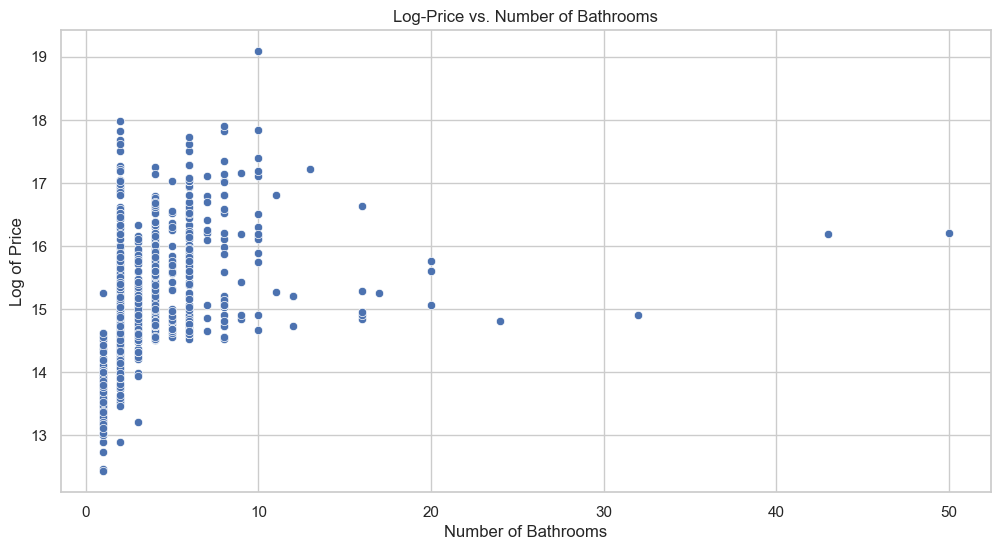

0.2644363322264557 0.36178837393068686


In [609]:
df_luxury['LOG_PRICE'] = np.log(df_luxury['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BEDS'])
bath_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [610]:
import plotly.express as px

fig = px.scatter_mapbox(df_luxury, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13036\1400820636.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

